In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
print("Vis setup Complete")
print("Setup complete.")

Vis setup Complete
Setup complete.


In [2]:
#Load the data using pandas read_csv function. This will generate a data frame we will use through the work.
#change to goalkeepers features later
#Load the data using pandas read_csv function. This will generate a data frame we will use through the work.
X = pd.read_csv('goalkeepers_rating_X.csv')
y = pd.read_csv('goalkeepers_rating_y.csv')

In [3]:
#Show the first and last few records to check data is loading correctly
print(X.head())
print(y.tail())

   assists  shots_offtarget  shotsblocked  chances2score  drib_success  \
0      0.0              0.0           0.0            0.0           0.0   
1      0.0              0.0           0.0            0.0           0.0   
2      0.0              0.0           0.0            0.0           0.0   
3      0.0              0.0           0.0            0.0           0.0   
4      0.0              0.0           0.0            0.0           0.0   

   drib_unsuccess  keypasses   touches  passes_acc  passes_inacc  ...  \
0             0.0        0.0  0.300000    0.181818      0.352941  ...   
1             0.0        0.0  0.114286    0.163636      0.117647  ...   
2             0.0        0.0  0.357143    0.218182      0.411765  ...   
3             0.0        0.0  0.357143    0.272727      0.235294  ...   
4             0.0        0.0  0.271429    0.200000      0.352941  ...   

   owngoals  degree_centrality  betweenness_centrality  closeness_centrality  \
0       0.0           0.529412      

In [4]:
X.columns

Index(['assists', 'shots_offtarget', 'shotsblocked', 'chances2score',
       'drib_success', 'drib_unsuccess', 'keypasses', 'touches', 'passes_acc',
       'passes_inacc', 'crosses_acc', 'crosses_inacc', 'lballs_acc',
       'lballs_inacc', 'grduels_w', 'grduels_l', 'aerials_w', 'aerials_l',
       'poss_lost', 'fouls', 'wasfouled', 'clearances', 'stop_shots',
       'interceptions', 'tackles', 'dribbled_past', 'tballs_acc',
       'tballs_inacc', 'ycards', 'dangmistakes', 'countattack', 'goals_ag_otb',
       'goals_ag_itb', 'saves_itb', 'saves_otb', 'saved_pen', 'owngoals',
       'degree_centrality', 'betweenness_centrality', 'closeness_centrality',
       'flow_centrality', 'betweenness2goals', 'game_duration', 'year',
       'month', 'day'],
      dtype='object')

In [5]:
X.head()

,assists,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,passes_acc,passes_inacc,...,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,game_duration,year,month,day
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.300000,0.181818,0.352941,...,0.0,0.529412,0.211194,0.542639,0.193203,0.0,0.0,0.0,0.454545,0.300000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.114286,0.163636,0.117647,...,0.0,0.411765,0.113325,0.480975,0.148263,0.0,0.0,0.0,0.454545,0.300000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.357143,0.218182,0.411765,...,0.0,0.389140,0.089820,0.430875,0.282541,0.0,0.0,0.0,0.454545,0.333333
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.357143,0.272727,0.235294,...,0.0,0.832579,0.231998,0.723777,0.536065,0.0,0.0,0.0,0.454545,0.333333
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.271429,0.200000,0.352941,...,0.0,0.769231,0.352154,0.638347,0.250781,0.0,0.0,0.0,0.454545,0.333333


In [6]:
y.head()

,original_rating
0,6.10
1,6.20
2,6.92
3,5.99
4,6.33


In [7]:
#removing columns;
import pandas as pd

# Assuming X is your DataFrame
# List of columns to drop
columns_to_drop =['chances2score', 'lballs_inacc', 'passes_acc', 'poss_lost', 'ycards'] 

# Drop the specified columns in place
X.drop(columns=columns_to_drop, inplace=True)

# Optionally, check the resulting DataFrame
print(X.head())

   assists  shots_offtarget  shotsblocked  drib_success  drib_unsuccess  \
0      0.0              0.0           0.0           0.0             0.0   
1      0.0              0.0           0.0           0.0             0.0   
2      0.0              0.0           0.0           0.0             0.0   
3      0.0              0.0           0.0           0.0             0.0   
4      0.0              0.0           0.0           0.0             0.0   

   keypasses   touches  passes_inacc  crosses_acc  crosses_inacc  ...  \
0        0.0  0.300000      0.352941          0.0            0.0  ...   
1        0.0  0.114286      0.117647          0.0            0.0  ...   
2        0.0  0.357143      0.411765          0.0            0.0  ...   
3        0.0  0.357143      0.235294          0.0            0.0  ...   
4        0.0  0.271429      0.352941          0.0            0.0  ...   

   owngoals  degree_centrality  betweenness_centrality  closeness_centrality  \
0       0.0           0.529412

## Modelling

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import time

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, split the train+validation set into separate training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Display the sizes of the splits to ensure they are correct
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 942
Validation set size: 314
Test set size: 315


In [10]:
X_train.head()

,assists,shots_offtarget,shotsblocked,drib_success,drib_unsuccess,keypasses,touches,passes_inacc,crosses_acc,crosses_inacc,...,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,game_duration,year,month,day
808,0.0,0.0,0.0,0.0,0.0,0.0,0.485714,0.411765,0.0,0.0,...,0.0,0.588235,0.174433,0.685438,0.706263,0.0,0.0,0.5,1.000000,0.966667
511,0.0,0.0,0.0,0.0,0.0,0.0,0.257143,0.176471,0.0,0.0,...,0.0,0.431373,0.298828,0.470929,0.292449,0.0,0.0,0.5,0.909091,0.133333
668,0.0,0.0,0.0,0.0,0.0,0.0,0.371429,0.294118,0.0,0.0,...,0.0,0.760784,0.315618,0.587737,0.397829,0.0,0.0,0.5,1.000000,0.266667
1440,0.0,0.0,0.0,0.0,0.0,0.0,0.185714,0.058824,0.0,0.0,...,0.0,0.541176,0.178584,0.470929,0.259723,0.0,0.0,1.0,0.363636,0.400000
190,0.0,0.0,0.0,0.0,0.0,0.0,0.614286,0.470588,0.0,0.0,...,0.0,0.705882,0.251837,0.685438,0.902527,0.0,0.0,0.5,0.636364,0.866667


In [11]:
X_val.shape

(314, 41)

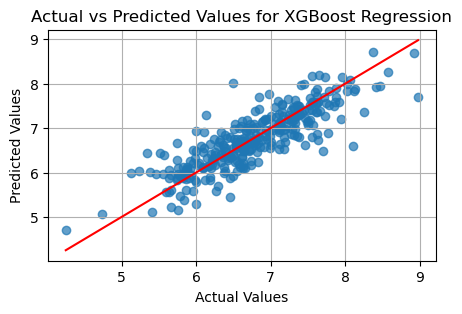

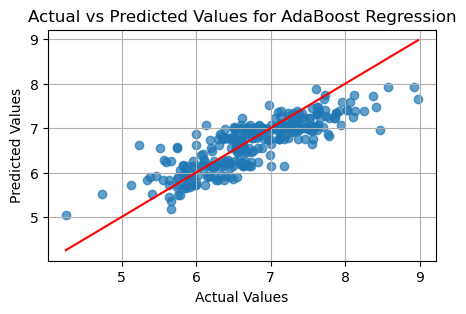

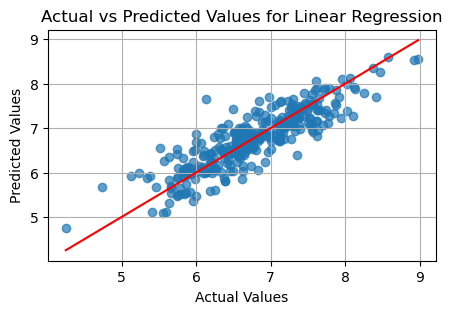

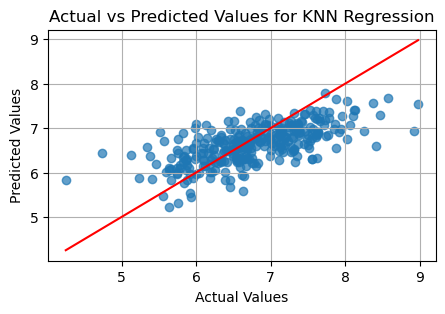

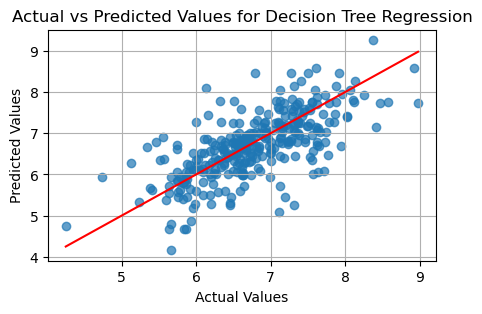

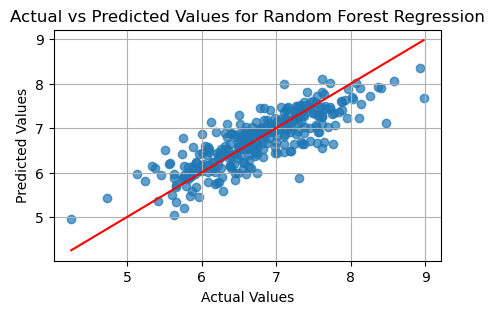

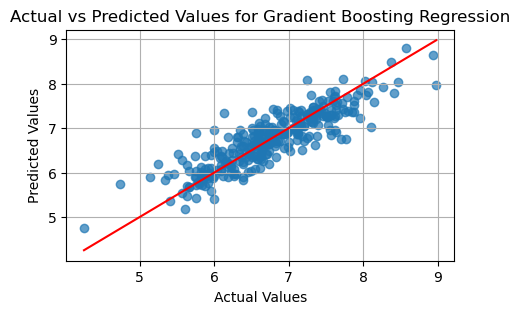

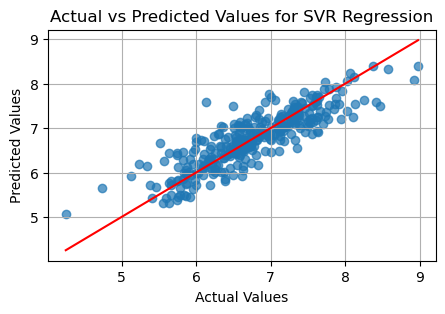

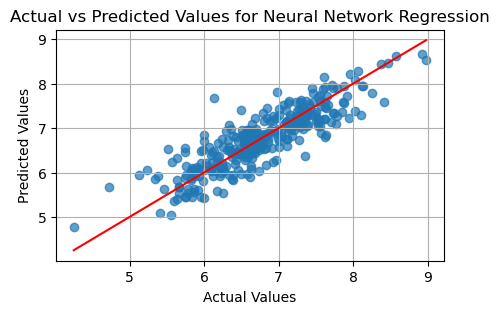

Validation Set Metrics:
                          Model   Val_MSE  Val_RMSE    Val_R2   Val_MAE  \
0            XGBoost Regression  0.154718  0.393342  0.701226  0.292941   
1           AdaBoost Regression  0.168814  0.410870  0.674005  0.321612   
2             Linear Regression  0.131468  0.362585  0.746124  0.277878   
3                KNN Regression  0.311619  0.558228  0.398237  0.433790   
4      Decision Tree Regression  0.374055  0.611601  0.277666  0.454904   
5      Random Forest Regression  0.161181  0.401473  0.688746  0.305329   
6  Gradient Boosting Regression  0.122229  0.349613  0.763964  0.262182   
7                SVR Regression  0.137690  0.371066  0.734108  0.280370   
8     Neural Network Regression  0.131749  0.362972  0.745581  0.280321   

      Val_R  
0  0.842069  
1  0.836219  
2  0.865918  
3  0.658434  
4  0.680540  
5  0.831155  
6  0.874066  
7  0.857137  
8  0.867220  


In [60]:
#features after removing correlated features, using base model, evaluation on val with crossvall
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from scipy.stats import pearsonr

# Example data - replace with your actual data
# data = pd.read_csv('your_data.csv') 
# X = data.drop('target', axis=1)
# y = data['target']

# Split data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure y_train and y_val are numpy arrays
y_train = y_train.values.ravel()
y_val = y_val.values.ravel()

# Define models
random_state = 42
models = [
    (XGBRegressor(random_state=random_state), 'XGBoost Regression'),
    (AdaBoostRegressor(random_state=random_state), 'AdaBoost Regression'),
    (LinearRegression(), 'Linear Regression'),
    (KNeighborsRegressor(), 'KNN Regression'),
    (DecisionTreeRegressor(random_state=random_state), 'Decision Tree Regression'),
    (RandomForestRegressor(random_state=random_state), 'Random Forest Regression'),
    (GradientBoostingRegressor(random_state=random_state), 'Gradient Boosting Regression'),
    (SVR(), 'SVR Regression'),
    (MLPRegressor(random_state=random_state, max_iter=1000), 'Neural Network Regression')
]

# DataFrame to store evaluation metrics
metrics_df = pd.DataFrame(columns=['Model', 'Val_MSE', 'Val_RMSE', 'Val_R2', 'Val_MAE', 'Val_R'])

# Define a custom scorer for Pearson correlation
def pearson_scorer(y_true, y_pred):
    return pearsonr(y_true, y_pred)[0]

# Convert it to a scorer object
pearson_scorer = make_scorer(pearson_scorer)

# Train, predict and evaluate models
metrics_list = []

for model, name in models:
    # Perform 3-fold cross-validation on the training set to ensure model robustness
    _ = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
    
    # Train the model on the entire training set
    model.fit(X_train, y_train)
    
    # Evaluate on the validation set
    y_pred = model.predict(X_val)
    
    val_mse = mean_squared_error(y_val, y_pred)
    val_rmse = np.sqrt(val_mse)
    val_r2 = r2_score(y_val, y_pred)
    val_mae = mean_absolute_error(y_val, y_pred)
    val_r, _ = pearsonr(y_val, y_pred)
    
    metrics_list.append({
        'Model': name,
        'Val_MSE': val_mse,
        'Val_RMSE': val_rmse,
        'Val_R2': val_r2,
        'Val_MAE': val_mae,
        'Val_R': val_r
    })
    
    # Plot actual vs predicted values
    plt.figure(figsize=(5, 3))
    plt.scatter(y_val, y_pred, alpha=0.7)
    plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red')  # Diagonal line
    plt.title(f'Actual vs Predicted Values for {name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

# Convert list of dictionaries to DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display validation set evaluation metrics
print("Validation Set Metrics:")
print(metrics_df)

Training XGBoost Regression...
Best parameters for XGBoost Regression: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}


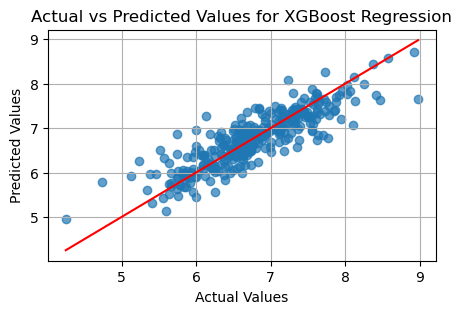

Training AdaBoost Regression...
Best parameters for AdaBoost Regression: {'learning_rate': 0.2, 'n_estimators': 200}


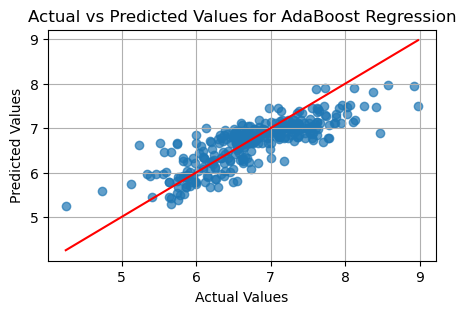

Training KNN Regression...
Best parameters for KNN Regression: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}


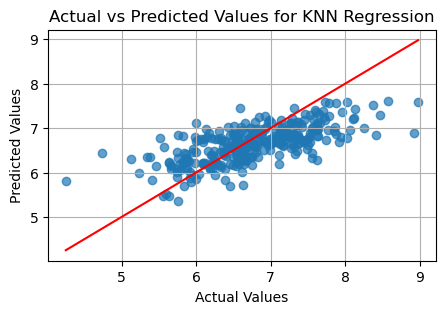

Training Decision Tree Regression...
Best parameters for Decision Tree Regression: {'max_depth': 10, 'min_samples_split': 20}


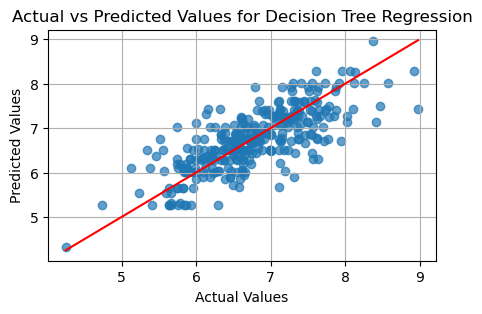

Training Random Forest Regression...
Best parameters for Random Forest Regression: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


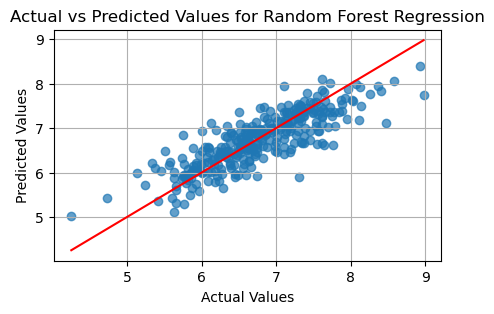

Training Gradient Boosting Regression...
Best parameters for Gradient Boosting Regression: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}


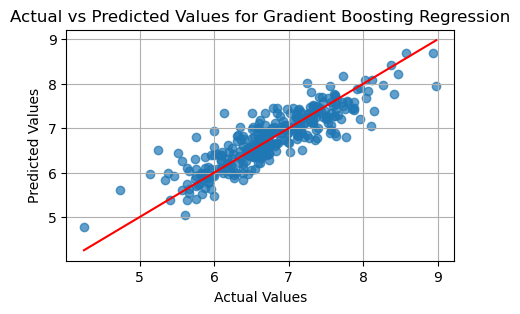

Training SVR Regression...
Best parameters for SVR Regression: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


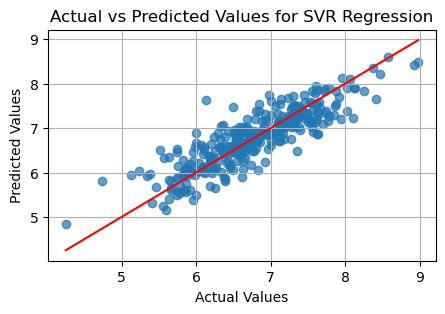

Training Neural Network Regression...
Best parameters for Neural Network Regression: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'solver': 'adam'}


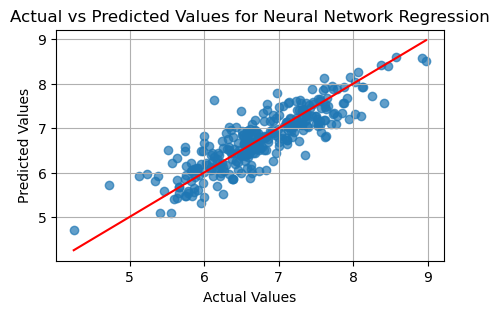

                          Model       MSE       MAE        R2      RMSE  \
0            XGBoost Regression  0.131977  0.270629  0.745140  0.363287   
1           AdaBoost Regression  0.182573  0.330159  0.647435  0.427286   
2                KNN Regression  0.293123  0.422758  0.433954  0.541408   
3      Decision Tree Regression  0.245678  0.379384  0.525573  0.495660   
4      Random Forest Regression  0.160798  0.303619  0.689484  0.400997   
5  Gradient Boosting Regression  0.121725  0.263267  0.764937  0.348892   
6                SVR Regression  0.131229  0.277077  0.746585  0.362255   
7     Neural Network Regression  0.132740  0.281111  0.743667  0.364336   

          R  
0  0.863446  
1  0.820960  
2  0.688443  
3  0.754150  
4  0.831277  
5  0.874769  
6  0.864828  
7  0.865561  


In [61]:
# Tuning the val data better with parameters
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Define models and parameters for GridSearchCV
random_state = 42

models = [
    (XGBRegressor(random_state=random_state), 'XGBoost Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    (AdaBoostRegressor(random_state=random_state), 'AdaBoost Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    }),
    (KNeighborsRegressor(), 'KNN Regression', {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree']
    }),
    (DecisionTreeRegressor(random_state=random_state), 'Decision Tree Regression', {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    }),
    (RandomForestRegressor(random_state=random_state), 'Random Forest Regression', {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    }),
    (GradientBoostingRegressor(random_state=random_state), 'Gradient Boosting Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    (SVR(), 'SVR Regression', {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf'],
        'gamma': ['scale', 'auto']
    }),
    (MLPRegressor(random_state=random_state, max_iter=1000), 'Neural Network Regression', {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['tanh', 'relu'],
        'solver': ['adam', 'lbfgs']
    })
]

# DataFrame to store evaluation metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2', 'RMSE','R'])

# Train, predict and evaluate models
metrics_list = []

for model, name, params in models:
    print(f"Training {name}...")
    kf = KFold(n_splits=5, shuffle=True, random_state=random_state)
    grid_search = GridSearchCV(model, param_grid=params, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Best parameters for {name}: {best_params}")
    
    y_pred = best_model.predict(X_val)
    
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    rmse = np.sqrt(mse)
    r, _ = pearsonr(y_val, y_pred)
    
    metrics_list.append({'Model': name, 'MSE': mse, 'MAE': mae, 'R2': r2, 'RMSE': rmse,'R':r})
    
    # Plot actual vs predicted values
    plt.figure(figsize=(5, 3))
    plt.scatter(y_val, y_pred, alpha=0.7)
    plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red')  # Diagonal line
    plt.title(f'Actual vs Predicted Values for {name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

# Convert list of dictionaries to DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display evaluation metrics
print(metrics_df)

                          Model      RMSE       MSE       MAE        R2  \
0            XGBoost Regression  0.364451  0.132824  0.266322  0.757514   
1           AdaBoost Regression  0.435742  0.189871  0.330061  0.653368   
2                KNN Regression  0.520670  0.271098  0.400782  0.505081   
3      Decision Tree Regression  0.500424  0.250424  0.380004  0.542822   
4      Random Forest Regression  0.401867  0.161497  0.293643  0.705169   
5  Gradient Boosting Regression  0.359562  0.129285  0.263624  0.763975   
6                SVR Regression  0.360682  0.130092  0.269510  0.762503   
7     Neural Network Regression  0.364569  0.132910  0.274007  0.757357   

          R  
0  0.870729  
1  0.818335  
2  0.736019  
3  0.752609  
4  0.840596  
5  0.874627  
6  0.874632  
7  0.870972  


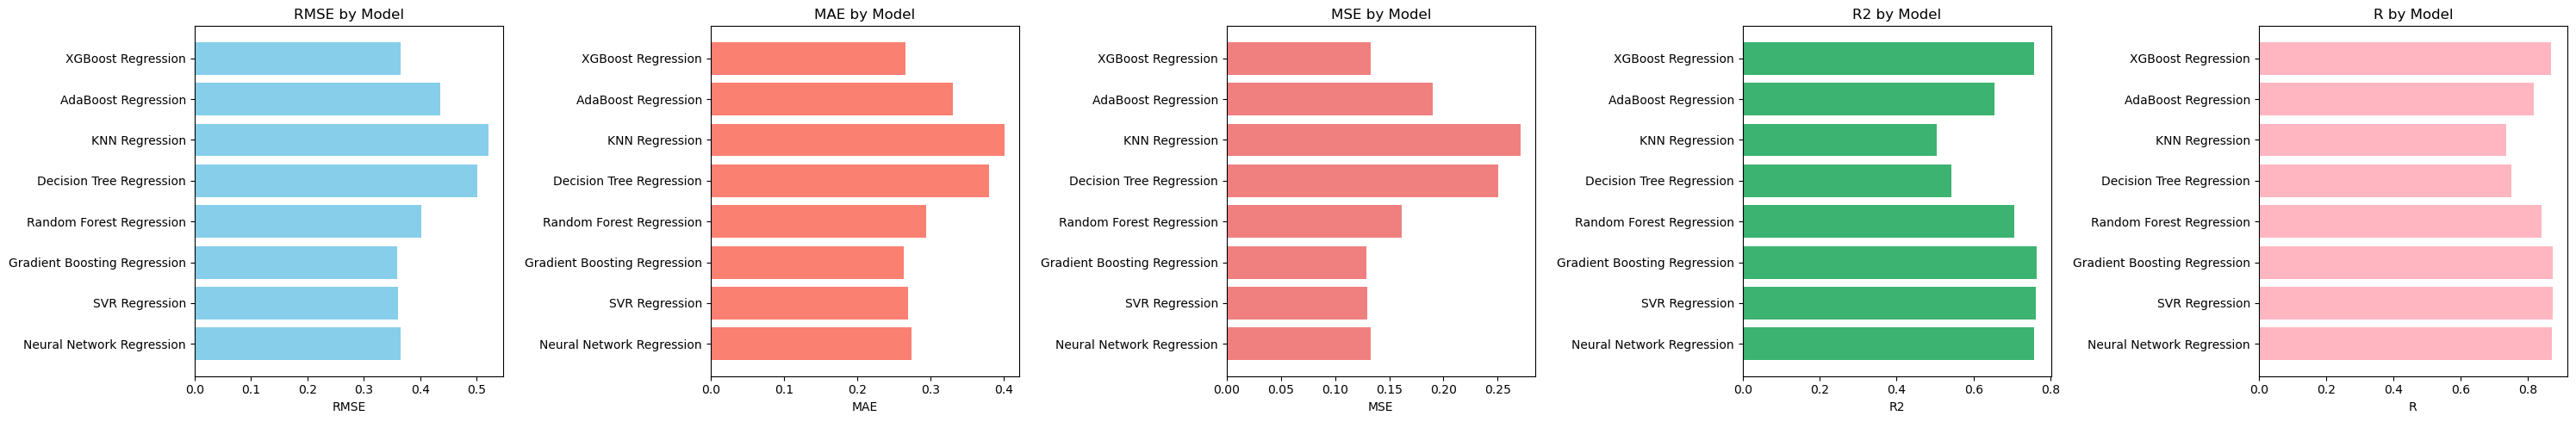

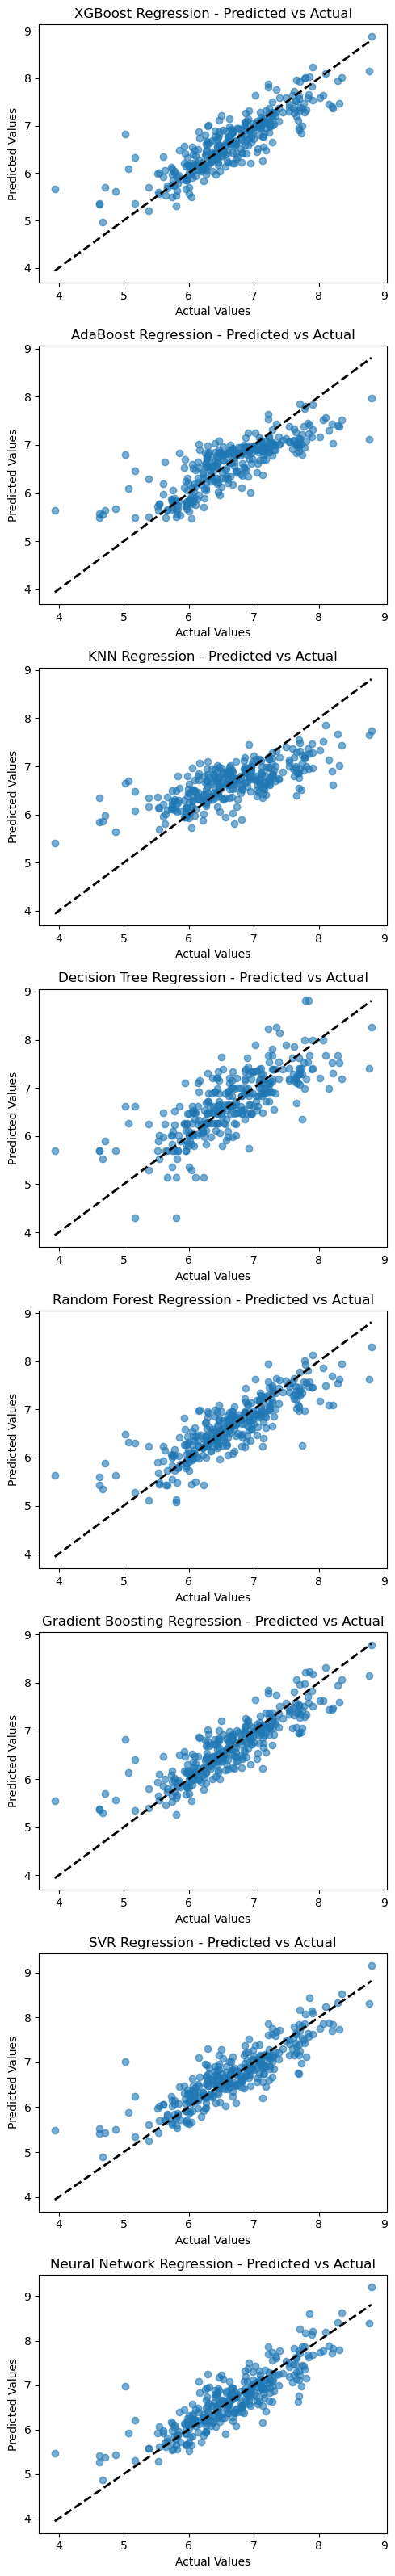

In [63]:
#using the best parameters on  features after correlation added on the test set
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.exceptions import ConvergenceWarning
from scipy.stats import pearsonr
import warnings

# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_test, and y_test are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_test = pd.DataFrame({...})
# y_test = pd.Series([...])

# Define models with the best parameters found
best_params = {
    'XGBoost Regression': {'n_estimators': 50, 'learning_rate': 0.2, 'max_depth': 3},
    'AdaBoost Regression': {'n_estimators': 200, 'learning_rate': 0.2},
    'KNN Regression': {'n_neighbors': 7, 'weights': 'distance', 'algorithm': 'auto'},
    'Decision Tree Regression': {'max_depth': 10, 'min_samples_split': 20},
    'Random Forest Regression': {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 2},
    'Gradient Boosting Regression': {'n_estimators': 50, 'learning_rate': 0.2, 'max_depth': 3},
    'SVR Regression': {'C': 1, 'kernel': 'linear', 'gamma': 'scale'},
    'Neural Network Regression': {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'adam'},
}

models = {
    'XGBoost Regression': XGBRegressor(random_state=random_state, **best_params['XGBoost Regression']),
    'AdaBoost Regression': AdaBoostRegressor(random_state=random_state, **best_params['AdaBoost Regression']),
    'KNN Regression': KNeighborsRegressor(**best_params['KNN Regression']),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=random_state, **best_params['Decision Tree Regression']),
    'Random Forest Regression': RandomForestRegressor(random_state=random_state, **best_params['Random Forest Regression']),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=random_state, **best_params['Gradient Boosting Regression']),
    'SVR Regression': SVR(**best_params['SVR Regression']),
    'Neural Network Regression': MLPRegressor(random_state=random_state, max_iter=1000, **best_params['Neural Network Regression']),
}

# Function to evaluate model on test data
def evaluate_on_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    r, _ = pearsonr(y_test.values.flatten(), predictions.flatten())
    
    return predictions, rmse, mae, mse, r2, r

# Evaluate each model
test_results = []
predictions_dict = {}

for name, model in models.items():
    predictions, rmse, mae, mse, r2, r = evaluate_on_test(model, X_train_val, y_train_val, X_test, y_test)
    test_results.append({
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'MSE': mse,
        'R2': r2,
        'R': r
    })
    predictions_dict[name] = predictions

# Convert test results to DataFrame
test_results_df = pd.DataFrame(test_results)

# Print the test results
print(test_results_df[['Model', 'RMSE', 'MSE', 'MAE', 'R2', 'R']])

# Visualization of the performance metrics
def plot_metrics(df):
    fig, axes = plt.subplots(1, 5, figsize=(30, 5))

    # RMSE
    axes[0].barh(df['Model'], df['RMSE'], color='skyblue')
    axes[0].set_title('RMSE by Model')
    axes[0].set_xlabel('RMSE')
    axes[0].invert_yaxis()

    # MAE
    axes[1].barh(df['Model'], df['MAE'], color='salmon')
    axes[1].set_title('MAE by Model')
    axes[1].set_xlabel('MAE')
    axes[1].invert_yaxis()

    # MSE
    axes[2].barh(df['Model'], df['MSE'], color='lightcoral')
    axes[2].set_title('MSE by Model')
    axes[2].set_xlabel('MSE')
    axes[2].invert_yaxis()

    # R2
    axes[3].barh(df['Model'], df['R2'], color='mediumseagreen')
    axes[3].set_title('R2 by Model')
    axes[3].set_xlabel('R2')
    axes[3].invert_yaxis()

    # R
    axes[4].barh(df['Model'], df['R'], color='lightpink')
    axes[4].set_title('R by Model')
    axes[4].set_xlabel('R')
    axes[4].invert_yaxis()

    plt.tight_layout()
    plt.show()

# Plot the metrics
plot_metrics(test_results_df)

# Visualization of predicted vs actual values
def plot_predictions(predictions_dict, y_test):
    fig, axes = plt.subplots(len(predictions_dict), 1, figsize=(5, len(predictions_dict) * 4))

    for i, (name, predictions) in enumerate(predictions_dict.items()):
        axes[i].scatter(y_test, predictions, alpha=0.6)
        axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        axes[i].set_title(f'{name} - Predicted vs Actual')
        axes[i].set_xlabel('Actual Values')
        axes[i].set_ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

# Plot the predictions
plot_predictions(predictions_dict, y_test)

                   Feature  Importance
27            goals_ag_itb    0.355675
28               saves_itb    0.254477
29               saves_otb    0.127512
26            goals_ag_otb    0.115198
13               aerials_w    0.037302
30               saved_pen    0.032472
10              lballs_acc    0.011667
24            dangmistakes    0.009775
34    closeness_centrality    0.009492
35         flow_centrality    0.007459
6                  touches    0.006713
12               grduels_l    0.006678
33  betweenness_centrality    0.004859
32       degree_centrality    0.003965
7             passes_inacc    0.003331
40                     day    0.002449
19           interceptions    0.002442
37           game_duration    0.001752
36       betweenness2goals    0.001323
39                   month    0.001175
25             countattack    0.001108
8              crosses_acc    0.000621
20                 tackles    0.000502
31                owngoals    0.000477
15                   foul

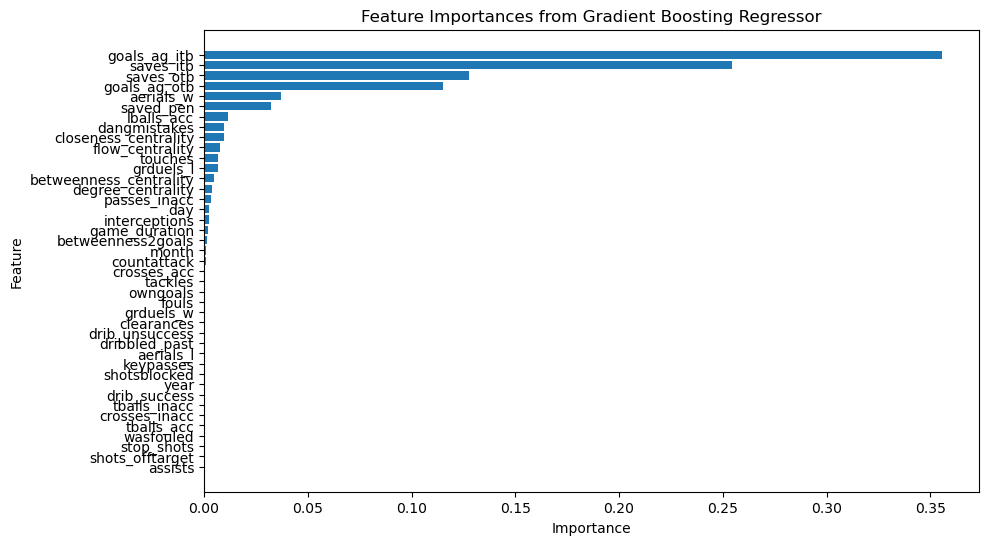

In [66]:
#using gradient boosting to find feature importance in the models 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

# Sample Data (Replace with your actual data)
# X_train_val_df = pd.DataFrame({...})
# y_train_val_df = pd.Series([...])

# Parameters from the tuning
random_state = 42
learning_rate = 0.2
n_estimators = 50
max_depth = 3

# Train GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(random_state=random_state, max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate)
gb_regressor.fit(X_train, y_train)

# Extract feature importances
importances = gb_regressor.feature_importances_
features = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(feature_importance_df)

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Gradient Boosting Regressor')
plt.gca().invert_yaxis()
plt.show()

In [18]:
#using subsets of features and performing parameter tunning it
import pandas as pd
import numpy as np
import random
import time
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings

# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_val, and y_val are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_val = pd.DataFrame({...})
# y_val = pd.Series([...])

# Calculate feature importances using RandomForestRegressor on training and validation data
gb_regressor = GradientBoostingRegressor(random_state=random_state, max_depth=3, n_estimators=50, learning_rate=0.2)
gb_regressor.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(gb_regressor.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Define subsets of features
feature_subsets = {
    'top_5': feature_importances.index[:5],
    'top_10': feature_importances.index[:10],
    'top_15': feature_importances.index[:15],
    'top_20': feature_importances.index[:20],
    'top_30': feature_importances.index[:30],
    'top_40': feature_importances.index[:40]
}

# Define models with parameter grids for hyperparameter tuning

models = [
    (XGBRegressor(random_state=random_state), 'XGBoost Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    (AdaBoostRegressor(random_state=random_state), 'AdaBoost Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    }),
    (KNeighborsRegressor(), 'KNN Regression', {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree']
    }),
    (DecisionTreeRegressor(random_state=random_state), 'Decision Tree Regression', {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    }),
    (RandomForestRegressor(random_state=random_state), 'Random Forest Regression', {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    }),
    (GradientBoostingRegressor(random_state=random_state), 'Gradient Boosting Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    (SVR(), 'SVR Regression', {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf'],
        'gamma': ['scale', 'auto']
    }),
    (MLPRegressor(random_state=random_state, max_iter=1000), 'Neural Network Regression', {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['tanh', 'relu'],
        'solver': ['adam', 'lbfgs']
    })
]

# Function to evaluate model with grid search
def evaluate_model(model, params, X_train, y_train, X_val, y_val):
    try:
        start_time = time.time()
        grid_search = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        end_time = time.time()
        
        best_model = grid_search.best_estimator_
        
        predictions = best_model.predict(X_val)
        
        mse = mean_squared_error(y_val, predictions)
        mae = mean_absolute_error(y_val, predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_val, predictions)
        
        training_time = end_time - start_time
        
        return mse, mae, rmse, r2, predictions, best_model, grid_search.best_params_, training_time
    except Exception as e:
        print(f"Error evaluating model {model}: {e}")
        return None, None, None, None, None, None, None, None

results = []

for subset_name, features in feature_subsets.items():
    X_train_subset = X_train[features]
    X_val_subset = X_val[features]
    for model, name, params in models:
        mse, mae, rmse, r2, predictions, best_model, best_params, training_time = evaluate_model(model, params, X_train_subset, y_train, X_val_subset, y_val)
        if best_model is not None:
            results.append({
                'Subset': subset_name,
                'Model': name,
                'MSE': f'{mse:.5f}',
                'MAE': f'{mae:.5f}',
                'RMSE': f'{rmse:.5f}',
                'R2 Score': f'{r2:.5f}',
                'Best Params': best_params,
                'Training Time (s)': f'{training_time:.5f}'
            })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Set display options to show the full content of the Best Params column
pd.set_option('display.max_colwidth', None)

# Print the results
print(results_df[['Subset', 'Model', 'MSE', 'MAE', 'RMSE', 'R2 Score', 'Best Params', 'Training Time (s)']])

    Subset                         Model      MSE      MAE     RMSE R2 Score  \
0    top_5            XGBoost Regression  0.14840  0.28354  0.38522  0.71343   
1    top_5           AdaBoost Regression  0.19081  0.33854  0.43682  0.63153   
2    top_5                KNN Regression  0.15782  0.29637  0.39726  0.69524   
3    top_5      Decision Tree Regression  0.20398  0.33871  0.45164  0.60610   
4    top_5      Random Forest Regression  0.15484  0.29327  0.39350  0.70098   
5    top_5  Gradient Boosting Regression  0.14404  0.28138  0.37953  0.72185   
6    top_5                SVR Regression  0.14249  0.28534  0.37748  0.72483   
7    top_5     Neural Network Regression  0.14776  0.28891  0.38440  0.71466   
8   top_10            XGBoost Regression  0.13169  0.26957  0.36289  0.74570   
9   top_10           AdaBoost Regression  0.18080  0.32981  0.42521  0.65085   
10  top_10                KNN Regression  0.16599  0.31100  0.40741  0.67947   
11  top_10      Decision Tree Regression

In [19]:
print(results_df[['Subset', 'Model', 'MSE',  'MAE', 'R2 Score', 'Best Params', 'Training Time (s)']])

    Subset                         Model      MSE      MAE R2 Score  \
0    top_5            XGBoost Regression  0.14840  0.28354  0.71343   
1    top_5           AdaBoost Regression  0.19081  0.33854  0.63153   
2    top_5                KNN Regression  0.15782  0.29637  0.69524   
3    top_5      Decision Tree Regression  0.20398  0.33871  0.60610   
4    top_5      Random Forest Regression  0.15484  0.29327  0.70098   
5    top_5  Gradient Boosting Regression  0.14404  0.28138  0.72185   
6    top_5                SVR Regression  0.14249  0.28534  0.72483   
7    top_5     Neural Network Regression  0.14776  0.28891  0.71466   
8   top_10            XGBoost Regression  0.13169  0.26957  0.74570   
9   top_10           AdaBoost Regression  0.18080  0.32981  0.65085   
10  top_10                KNN Regression  0.16599  0.31100  0.67947   
11  top_10      Decision Tree Regression  0.21084  0.35535  0.59286   
12  top_10      Random Forest Regression  0.14708  0.28902  0.71598   
13  to

In [20]:
#visualising the best subsets to use
import pandas as pd

# Assuming results_df is already defined and contains your results
# Convert only the metric columns to numeric values for averaging
metric_columns = ['MSE', 'MAE','RMSE','R2 Score', 'Training Time (s)']
for col in metric_columns:
    results_df[col] = pd.to_numeric(results_df[col], errors='coerce')

# Group by subset and calculate the mean of each metric
subset_averages = results_df.groupby('Subset')[metric_columns].mean().reset_index()

# Display the averaged results
print(subset_averages)

   Subset       MSE       MAE      RMSE  R2 Score  Training Time (s)
0  top_10  0.151729  0.294326  0.387717  0.707000          21.002404
1  top_15  0.156608  0.298564  0.393763  0.697576          26.015504
2  top_20  0.164391  0.306991  0.401875  0.682546          28.523226
3  top_30  0.168361  0.310050  0.406137  0.674879          30.818303
4  top_40  0.172802  0.313173  0.410215  0.666300          34.281058
5   top_5  0.161268  0.300758  0.400731  0.688577          16.286679


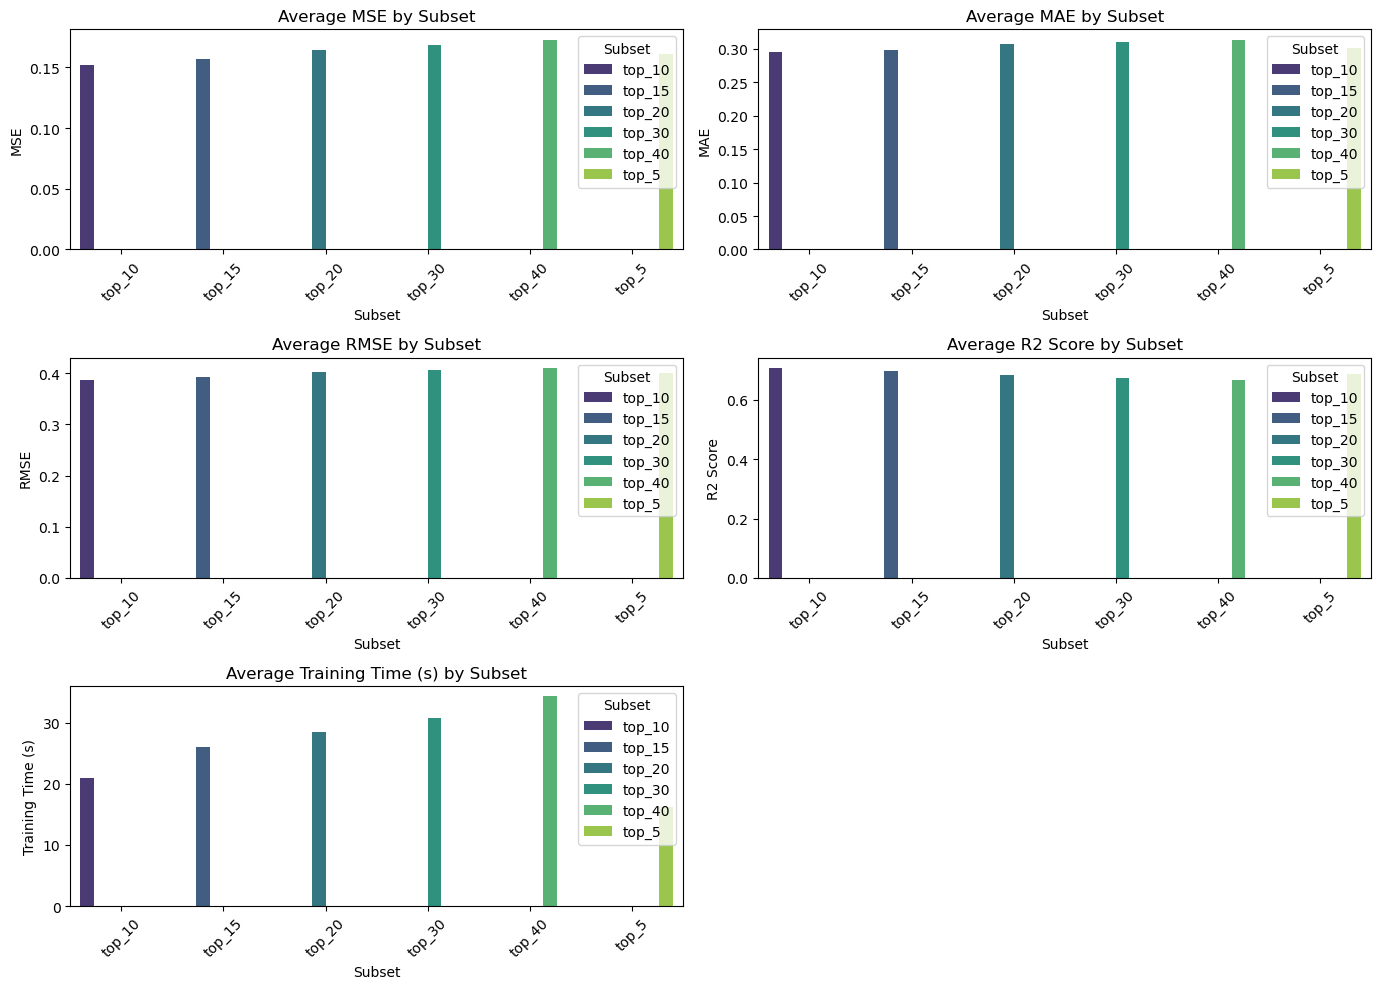

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14, 10))

# Plotting the averages for each metric
metrics = ['MSE', 'MAE','RMSE','R2 Score', 'Training Time (s)']

for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 2, i)
    sns.barplot(data=subset_averages, x='Subset', y=metric, hue='Subset', palette='viridis')
    plt.title(f'Average {metric} by Subset')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

                          Model       MSE       MAE      RMSE        R2  \
0            XGBoost Regression  0.130490  0.265268  0.361235  0.761775   
1           AdaBoost Regression  0.189407  0.333018  0.435210  0.654216   
2                KNN Regression  0.166026  0.298125  0.407463  0.696901   
3      Decision Tree Regression  0.224877  0.365800  0.474212  0.589463   
4      Random Forest Regression  0.153384  0.291027  0.391643  0.719981   
5  Gradient Boosting Regression  0.130679  0.264605  0.361495  0.761432   
6                SVR Regression  0.131570  0.272679  0.362726  0.759803   
7     Neural Network Regression  0.131077  0.267466  0.362045  0.760704   

          R  
0  0.872916  
1  0.815275  
2  0.835842  
3  0.779539  
4  0.848689  
5  0.872721  
6  0.873579  
7  0.874094  


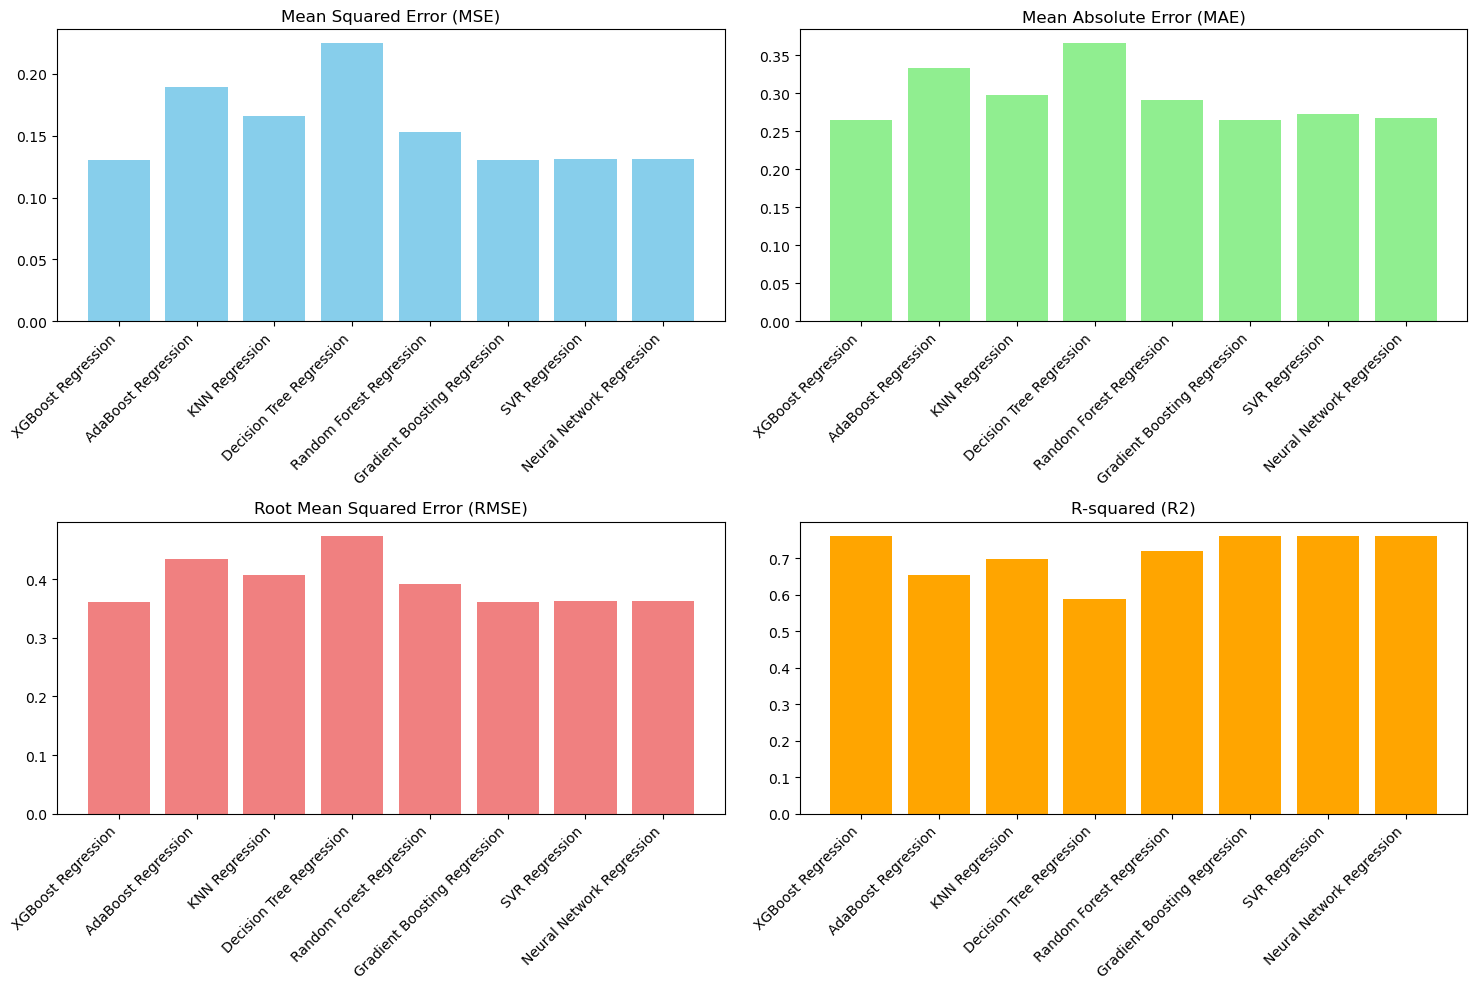

In [27]:
#using top 10 features with the X_train_val dataset and test sets, with the best parameters earlier
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.exceptions import ConvergenceWarning
import warnings
from scipy.stats import pearsonr


# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_test, and y_test are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_test = pd.DataFrame({...})
# y_test = pd.Series([...])

# Select the subset of 20 features
selected_features = feature_importances.index[:10]
X_train_val_subset = X_train_val[selected_features]
X_test_subset = X_test[selected_features]

# Define models with the best parameters found

best_params = {
    'XGBoost Regression': {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3},
    'AdaBoost Regression': {'n_estimators': 200, 'learning_rate': 0.2},
    'KNN Regression': {'n_neighbors': 7, 'weights': 'distance', 'algorithm': 'auto'},
    'Decision Tree Regression': {'max_depth': 10, 'min_samples_split': 20},
    'Random Forest Regression': {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 10},
    'Gradient Boosting Regression': {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3},
    'SVR Regression': {'C': 10, 'kernel': 'rbf', 'gamma': 'auto'},
    'Neural Network Regression': {'hidden_layer_sizes': (50,50), 'activation': 'relu', 'solver': 'adam'}
}

models = {
    'XGBoost Regression': XGBRegressor(random_state=random_state, **best_params['XGBoost Regression']),
    'AdaBoost Regression': AdaBoostRegressor(random_state=random_state, **best_params['AdaBoost Regression']),
    'KNN Regression': KNeighborsRegressor(**best_params['KNN Regression']),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=random_state, **best_params['Decision Tree Regression']),
    'Random Forest Regression': RandomForestRegressor(random_state=random_state, **best_params['Random Forest Regression']),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=random_state, **best_params['Gradient Boosting Regression']),
    'SVR Regression': SVR(**best_params['SVR Regression']),
    'Neural Network Regression': MLPRegressor(random_state=random_state, max_iter=1000, **best_params['Neural Network Regression'])
}

# Function to evaluate model on test data
def evaluate_on_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    y_test = np.ravel(y_test)
    predictions = np.ravel(predictions)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    r, _ = pearsonr(y_test, predictions)
    
    return rmse, mae, mse, r2,r

# Evaluate each model
test_results = []

for name, model in models.items():
    rmse, mae, mse, r2,r = evaluate_on_test(model, X_train_val_subset, y_train_val, X_test_subset, y_test)
    test_results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'R':r
    })

# Convert test results to DataFrame
test_results_df = pd.DataFrame(test_results)

# Print the test results
print(test_results_df[['Model', 'MSE', 'MAE', 'RMSE', 'R2','R']])

# Visualization of metrics for each model
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot MSE
axs[0, 0].bar(test_results_df['Model'], test_results_df['MSE'], color='skyblue')
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 0].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot MAE
axs[0, 1].bar(test_results_df['Model'], test_results_df['MAE'], color='lightgreen')
axs[0, 1].set_title('Mean Absolute Error (MAE)')
axs[0, 1].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot RMSE
axs[1, 0].bar(test_results_df['Model'], test_results_df['RMSE'], color='lightcoral')
axs[1, 0].set_title('Root Mean Squared Error (RMSE)')
axs[1, 0].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot R2 Score
axs[1, 1].bar(test_results_df['Model'], test_results_df['R2'], color='orange')
axs[1, 1].set_title('R-squared (R2)')
axs[1, 1].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

                           Model       MSE      RMSE       MAE        R2  \
0             XGBoost Regression  0.130490  0.361235  0.265268  0.761775   
1            AdaBoost Regression  0.189407  0.435210  0.333018  0.654216   
2                 KNN Regression  0.166026  0.407463  0.298125  0.696901   
3       Decision Tree Regression  0.224877  0.474212  0.365800  0.589463   
4       Random Forest Regression  0.153384  0.391643  0.291027  0.719981   
5   Gradient Boosting Regression  0.130679  0.361495  0.264605  0.761432   
6                 SVR Regression  0.131570  0.362726  0.272679  0.759803   
7      Neural Network Regression  0.131077  0.362045  0.267466  0.760704   
8               Voting Regressor  0.122582  0.350117  0.256372  0.776213   
9        Stacking Regressor (LR)  0.123427  0.351322  0.262978  0.774669   
10       Stacking Regressor (RF)  0.146528  0.382790  0.281345  0.732497   
11       Stacking Regressor (GB)  0.136371  0.369285  0.270430  0.751039   

           

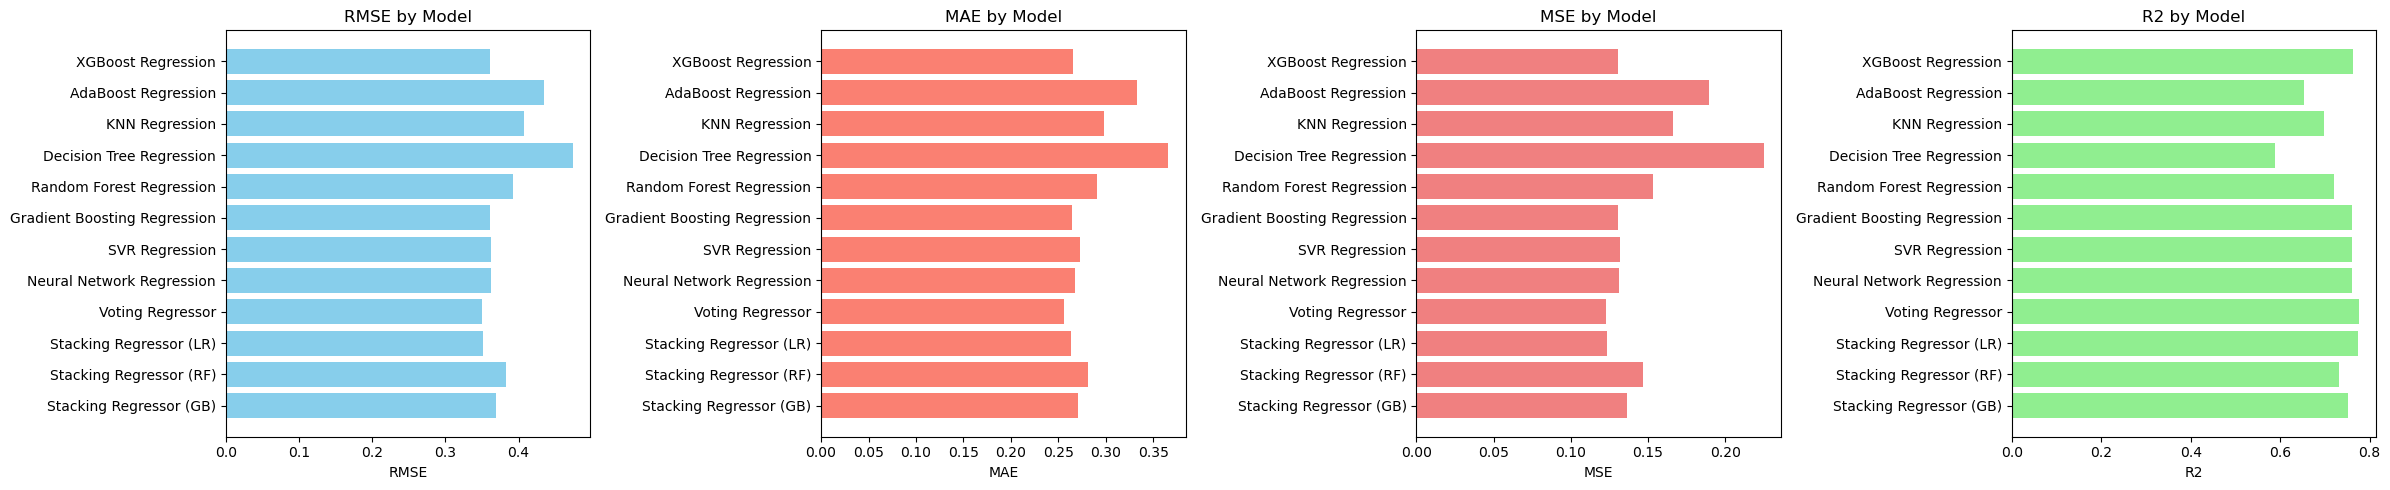

In [30]:
#using ensembling methods for the 10 features as well for the test
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.exceptions import ConvergenceWarning
import warnings
from sklearn.metrics import mean_squared_error

# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_test, and y_test are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_test = pd.DataFrame({...})
# y_test = pd.Series([...])

# Select the subset of 20 features
selected_features = feature_importances.index[:10]
X_train_val_subset = X_train_val[selected_features]
X_test_subset = X_test[selected_features]

# Define models with the best parameters found
best_params = {
    'XGBoost Regression': {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3},
    'AdaBoost Regression': {'n_estimators': 200, 'learning_rate': 0.2},
    'KNN Regression': {'n_neighbors': 7, 'weights': 'distance', 'algorithm': 'auto'},
    'Decision Tree Regression': {'max_depth': 10, 'min_samples_split': 20},
    'Random Forest Regression': {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 10},
    'Gradient Boosting Regression': {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3},
    'SVR Regression': {'C': 10, 'kernel': 'rbf', 'gamma': 'auto'},
    'Neural Network Regression': {'hidden_layer_sizes': (50,50), 'activation': 'relu', 'solver': 'adam'}
}

models = {
    'XGBoost Regression': XGBRegressor(random_state=random_state, **best_params['XGBoost Regression']),
    'AdaBoost Regression': AdaBoostRegressor(random_state=random_state, **best_params['AdaBoost Regression']),
    'KNN Regression': KNeighborsRegressor(**best_params['KNN Regression']),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=random_state, **best_params['Decision Tree Regression']),
    'Random Forest Regression': RandomForestRegressor(random_state=random_state, **best_params['Random Forest Regression']),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=random_state, **best_params['Gradient Boosting Regression']),
    'SVR Regression': SVR(**best_params['SVR Regression']),
    'Neural Network Regression': MLPRegressor(random_state=random_state, max_iter=1000, **best_params['Neural Network Regression'])
}

# Adding ensembling methods
voting_regressor = VotingRegressor(estimators=[
    ('xgb', models['XGBoost Regression']),
    ('rf', models['Random Forest Regression']),
    ('gb', models['Gradient Boosting Regression']),
    ('svr', models['SVR Regression']),
    ('nn', models['Neural Network Regression'])
])

stacking_regressor_lr = StackingRegressor(
    estimators=[
        ('xgb', models['XGBoost Regression']),
        ('rf', models['Random Forest Regression']),
        ('gb', models['Gradient Boosting Regression']),
        ('svr', models['SVR Regression']),
        ('nn', models['Neural Network Regression'])
    ],
    final_estimator=LinearRegression()
)

stacking_regressor_rf = StackingRegressor(
    estimators=[
        ('xgb', models['XGBoost Regression']),
        ('rf', models['Random Forest Regression']),
        ('gb', models['Gradient Boosting Regression']),
        ('svr', models['SVR Regression']),
        ('nn', models['Neural Network Regression'])
    ],
    final_estimator=RandomForestRegressor(n_estimators=100, random_state=random_state)
)

stacking_regressor_gb = StackingRegressor(
    estimators=[
        ('xgb', models['XGBoost Regression']),
        ('rf', models['Random Forest Regression']),
        ('gb', models['Gradient Boosting Regression']),
        ('svr', models['SVR Regression']),
        ('nn', models['Neural Network Regression'])
    ],
    final_estimator=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=random_state)
)

models.update({
    'Voting Regressor': voting_regressor,
    'Stacking Regressor (LR)': stacking_regressor_lr,
    'Stacking Regressor (RF)': stacking_regressor_rf,
    'Stacking Regressor (GB)': stacking_regressor_gb
})

# Function to evaluate model on test data
def evaluate_on_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    y_test = np.ravel(y_test)
    predictions = np.ravel(predictions)
    
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse) 
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    r, _ = pearsonr(y_test, predictions)
    
    return rmse, mae, mse, r2,r

# Evaluate each model
test_results = []

for name, model in models.items():
    rmse, mae, mse, r2,r = evaluate_on_test(model, X_train_val_subset, y_train_val, X_test_subset, y_test)
    test_results.append({
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'MSE': mse,
        'R2': r2,
        'R':r
    })

# Convert test results to DataFrame
test_results_df = pd.DataFrame(test_results)

# Print the test results
print(test_results_df[['Model', 'MSE', 'RMSE', 'MAE', 'R2','R']])

# Visualization of the performance metrics
def plot_metrics(df):
    fig, axes = plt.subplots(1, 4, figsize=(24, 5))

    # RMSE
    axes[0].barh(df['Model'], df['RMSE'], color='skyblue')
    axes[0].set_title('RMSE by Model')
    axes[0].set_xlabel('RMSE')
    axes[0].invert_yaxis()

    # MAE
    axes[1].barh(df['Model'], df['MAE'], color='salmon')
    axes[1].set_title('MAE by Model')
    axes[1].set_xlabel('MAE')
    axes[1].invert_yaxis()

    # MSE
    axes[2].barh(df['Model'], df['MSE'], color='lightcoral')
    axes[2].set_title('MSE by Model')
    axes[2].set_xlabel('MSE')
    axes[2].invert_yaxis()

    # R2
    axes[3].barh(df['Model'], df['R2'], color='lightgreen')
    axes[3].set_title('R2 by Model')
    axes[3].set_xlabel('R2')
    axes[3].invert_yaxis()

    plt.tight_layout()
    plt.show()

# Plot the metrics
plot_metrics(test_results_df)

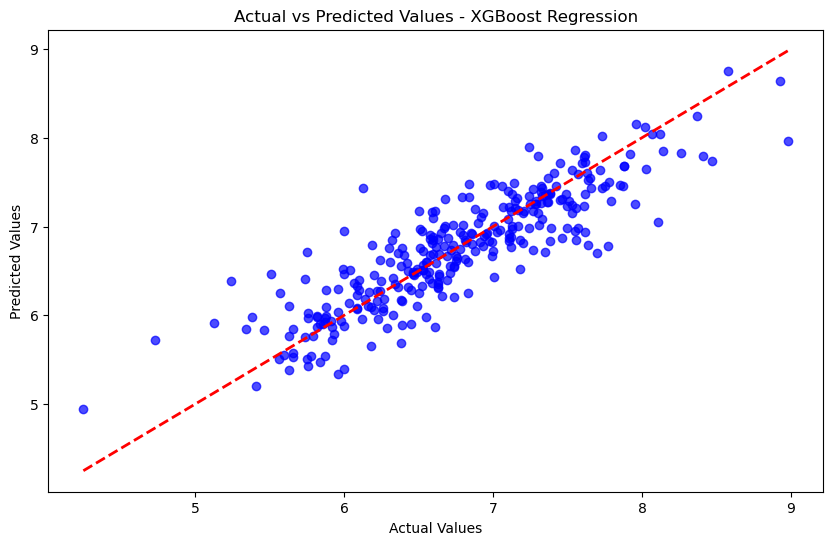

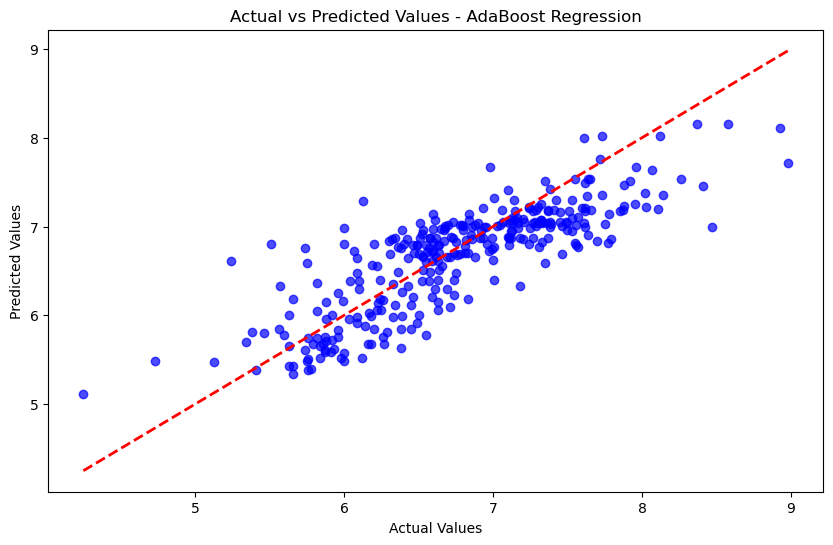

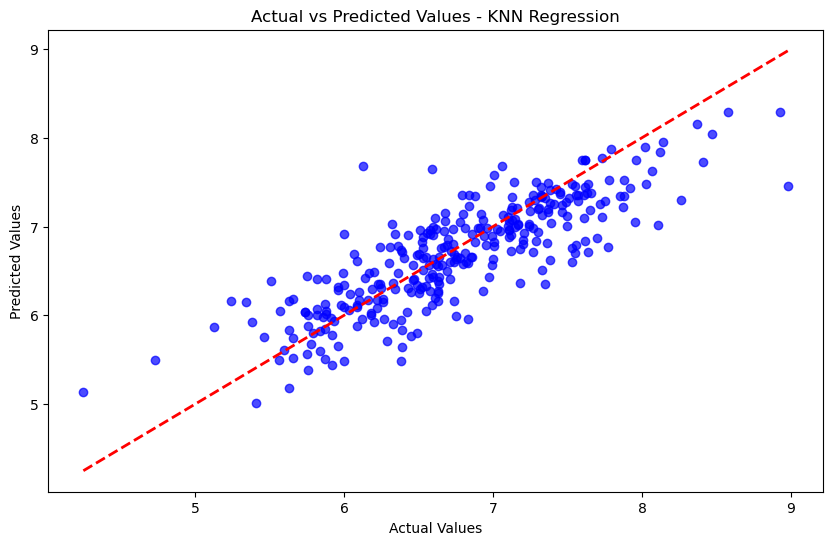

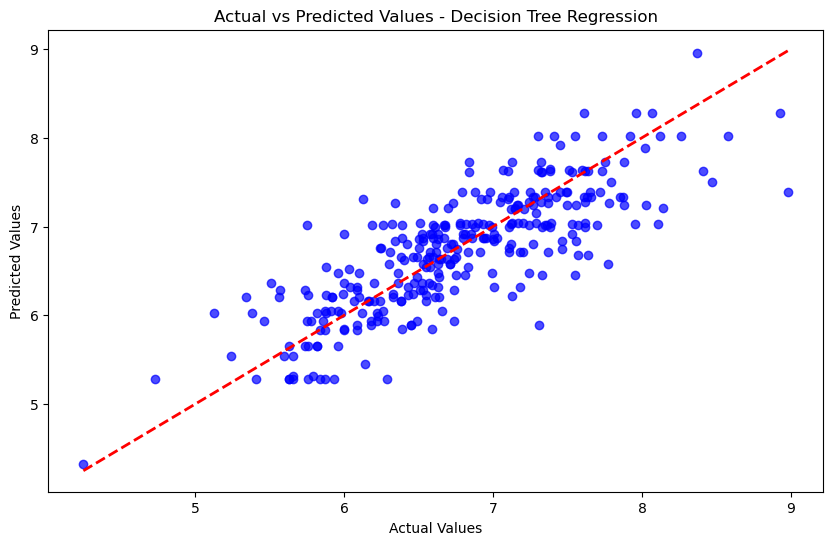

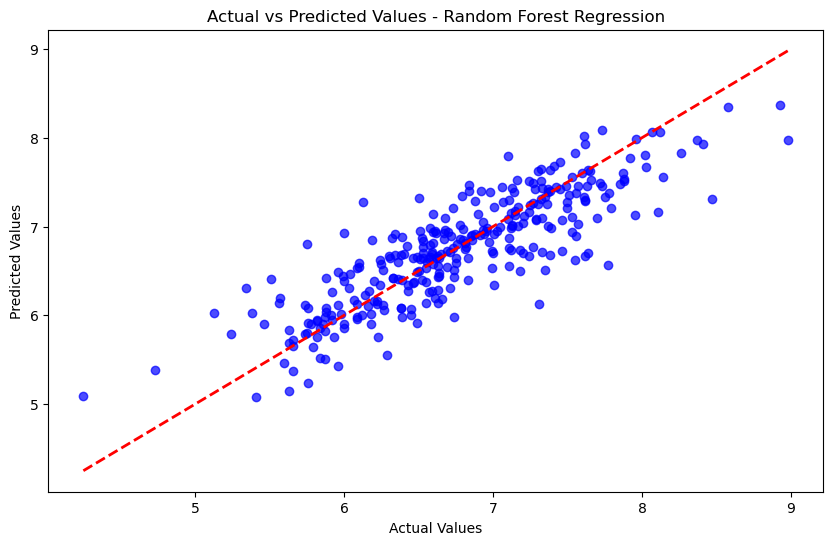

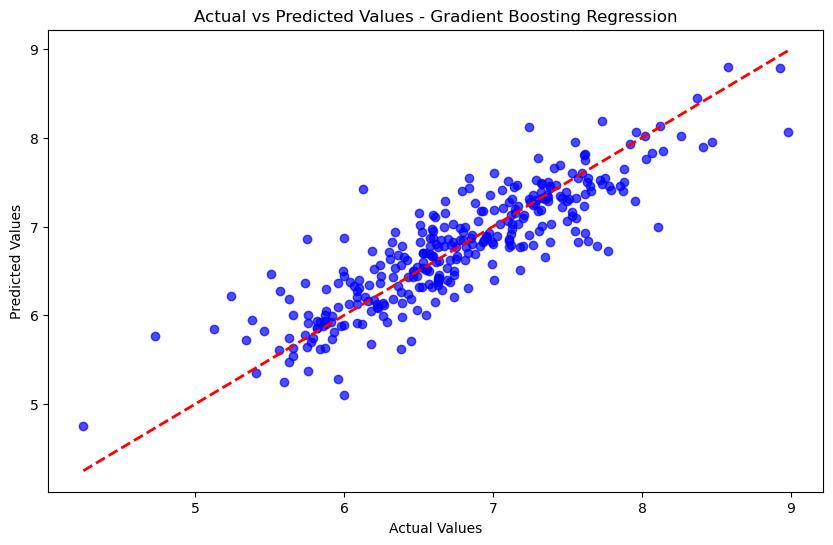

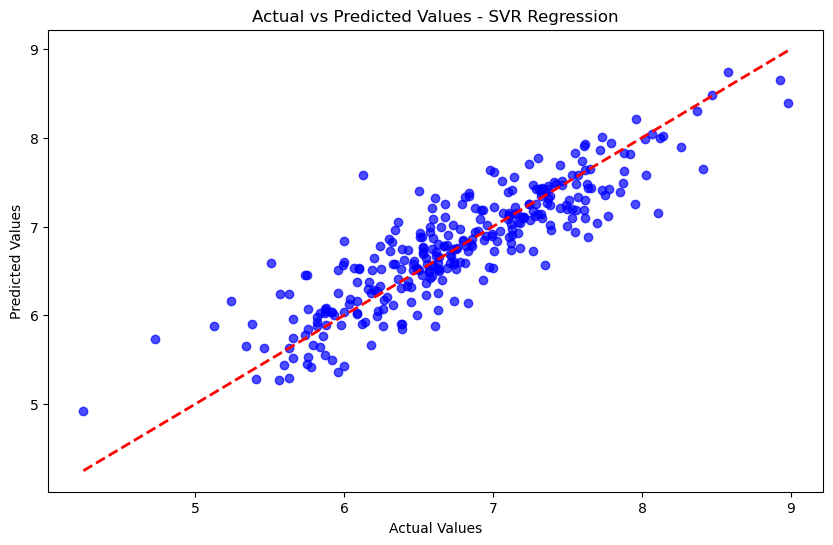

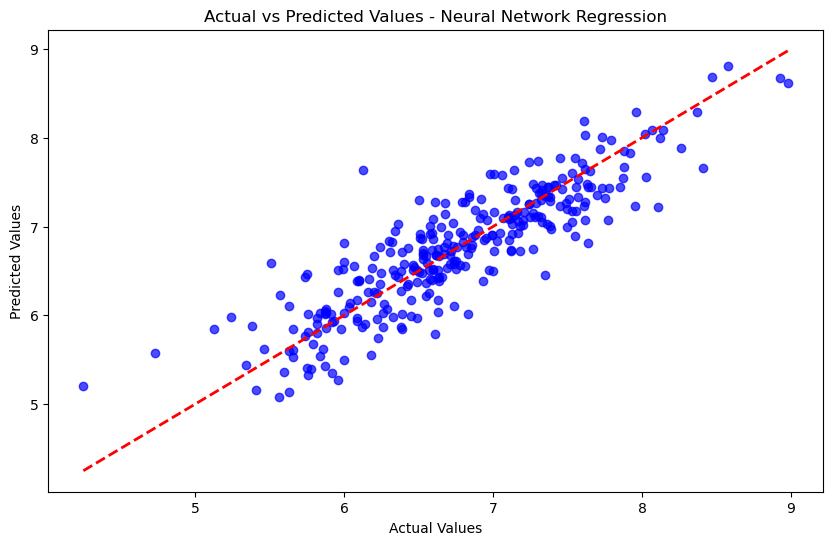

   Subset                         Model      MSE      MAE     RMSE       R2  \
0  top_10            XGBoost Regression  0.12763  0.26643  0.35725  0.75354   
1  top_10           AdaBoost Regression  0.17867  0.33465  0.42269  0.65498   
2  top_10                KNN Regression  0.16599  0.31100  0.40741  0.67947   
3  top_10      Decision Tree Regression  0.19367  0.33920  0.44008  0.62601   
4  top_10      Random Forest Regression  0.14708  0.28902  0.38351  0.71598   
5  top_10  Gradient Boosting Regression  0.12572  0.26566  0.35458  0.75722   
6  top_10                SVR Regression  0.11961  0.26030  0.34584  0.76903   
7  top_10     Neural Network Regression  0.12432  0.26852  0.35258  0.75994   

                                   Best Params Training Time (s)  
0  {'colsample_bytree': 0.6, 'subsample': 0.6}           4.26198  
1                           {'loss': 'square'}           3.65944  
2                            {'leaf_size': 10}           0.18158  
3                   

In [35]:
#using more parameters to tune the top 10 features
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings

# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_val, and y_val are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_val = pd.DataFrame({...})
# y_val = pd.Series([...])


# Define subset of features (top 20 only)
# Select the subset of 20 features
selected_features = feature_importances.index[:10]
X_train_subset = X_train[selected_features]
X_val_subset = X_val[selected_features]

# Define models with parameter grids for hyperparameter tuning

models = [
    (XGBRegressor(random_state=random_state,n_estimators=100,learning_rate=0.1,max_depth=3), 'XGBoost Regression', {
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
    }),
    (AdaBoostRegressor(random_state=random_state,learning_rate=0.2,n_estimators=200), 'AdaBoost Regression', {
        'loss': ['linear', 'square', 'exponential']
    }),
    (KNeighborsRegressor(n_neighbors=7,weights='distance',algorithm='auto'), 'KNN Regression', {
        'leaf_size': [10, 20, 30, 40, 50]
    }),
    (DecisionTreeRegressor(random_state=random_state,max_depth=10,min_samples_split=20), 'Decision Tree Regression', {
        'min_samples_leaf': [1, 2, 4, 6, 8]
    }),
    (RandomForestRegressor(random_state=random_state,max_depth=20,min_samples_split=10,n_estimators=200), 'Random Forest Regression', {
        'bootstrap': [True, False]
    }),
    (GradientBoostingRegressor(random_state=random_state,learning_rate=0.1,max_depth=3,n_estimators=100), 'Gradient Boosting Regression', {
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]
    }),
    (SVR(C=10,gamma='auto',kernel='rbf'), 'SVR Regression', {
        'epsilon': [0.1, 0.2, 0.5, 0.3, 0.05]
    }),
    (MLPRegressor(random_state=random_state, max_iter=1000,hidden_layer_sizes= (50,50,),activation='relu', solver='adam'), 'Neural Network Regression', {
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'learning_rate': ['constant', 'invscaling', 'adaptive']
    })
]

# Function to evaluate model with grid search
def evaluate_model(model, params, X_train, y_train, X_val, y_val):
    try:
        start_time = time.time()
        grid_search = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        end_time = time.time()
        
        best_model = grid_search.best_estimator_
        
        predictions = best_model.predict(X_val)
        
    
        mse = mean_squared_error(y_val, predictions)
        rmse = np.sqrt(mse) 
        mae = mean_absolute_error(y_val, predictions)
        r2 = r2_score(y_val, predictions)

        
        training_time = end_time - start_time
        
        return mse, mae, rmse, r2,predictions, best_model, grid_search.best_params_, training_time
    except Exception as e:
        print(f"Error evaluating model {model}: {e}")
        return None, None, None, None, None, None, None, None

# Function to plot predicted vs actual values
def plot_predictions(y_val, predictions, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_val, predictions, alpha=0.7, color='b')
    plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted Values - {model_name}')
    plt.show()

results = []

for model, name, params in models:
    mse, mae, rmse, r2, predictions, best_model, best_params, training_time = evaluate_model(model, params, X_train_subset, y_train, X_val_subset, y_val)
    if best_model is not None:
        results.append({
            'Subset': 'top_10',
            'Model': name,
            'MSE': f'{mse:.5f}',
            'MAE': f'{mae:.5f}',
            'RMSE': f'{rmse:.5f}',
            'R2': f'{r2:.5f}',
            'Best Params': best_params,
            'Training Time (s)': f'{training_time:.5f}'
        })
        # Plot predictions vs actual values
        plot_predictions(y_val, predictions, name)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Set display options to show the full content of the Best Params column
pd.set_option('display.max_colwidth', None)

# Print the results
print(results_df[['Subset', 'Model', 'MSE', 'MAE', 'RMSE', 'R2', 'Best Params', 'Training Time (s)']])

                          Model      RMSE       MSE       MAE        R2  \
0            XGBoost Regression  0.351160  0.123313  0.254578  0.774877   
1           AdaBoost Regression  0.421488  0.177652  0.320763  0.675676   
2                KNN Regression  0.407463  0.166026  0.298125  0.696901   
3      Decision Tree Regression  0.476867  0.227402  0.368027  0.584852   
4      Random Forest Regression  0.391643  0.153384  0.291027  0.719981   
5  Gradient Boosting Regression  0.364935  0.133177  0.267358  0.756870   
6                SVR Regression  0.362726  0.131570  0.272679  0.759803   
7     Neural Network Regression  0.356260  0.126921  0.265327  0.768292   

          R  
0  0.880576  
1  0.828327  
2  0.835842  
3  0.776098  
4  0.848689  
5  0.870010  
6  0.873579  
7  0.878040  


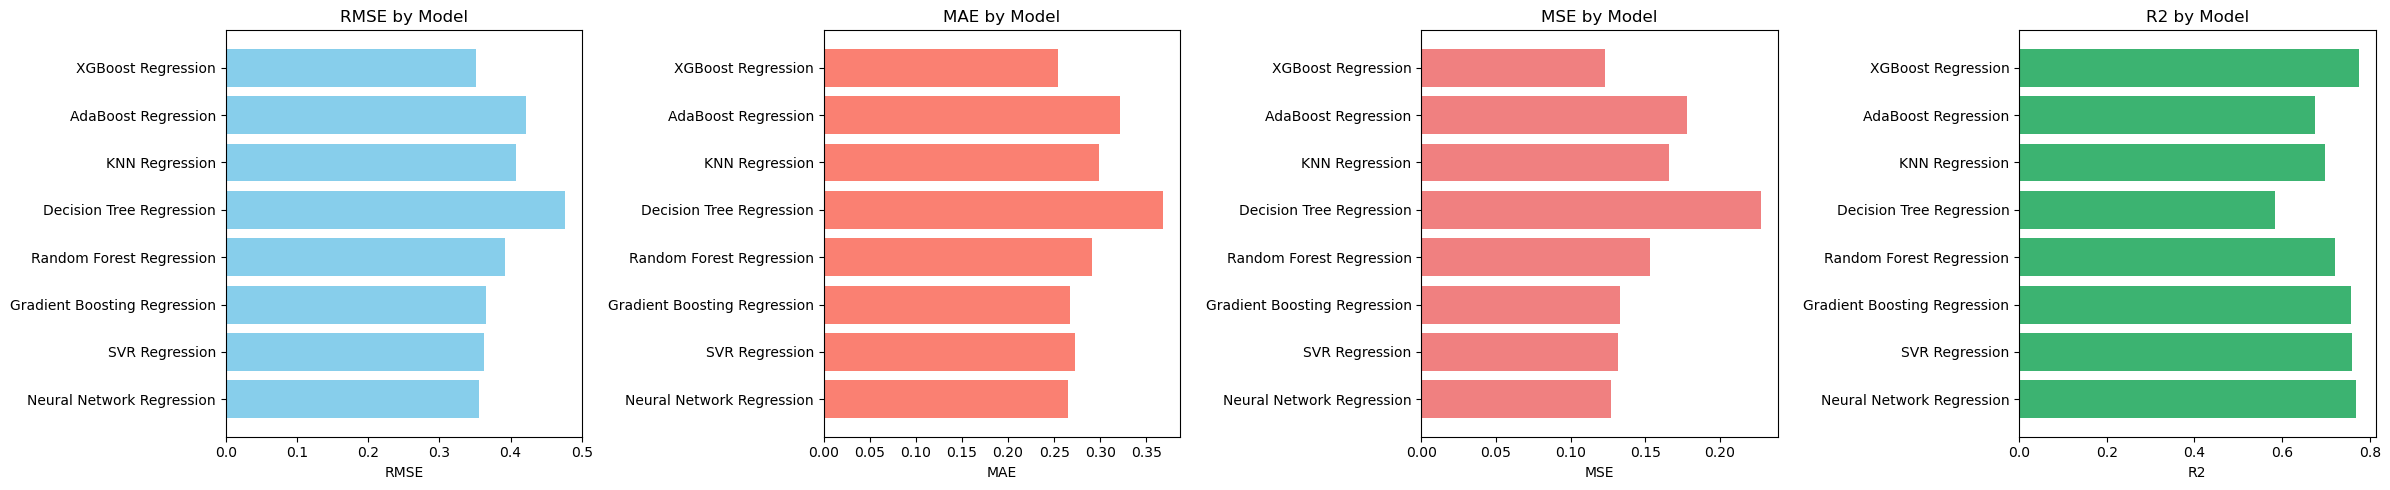

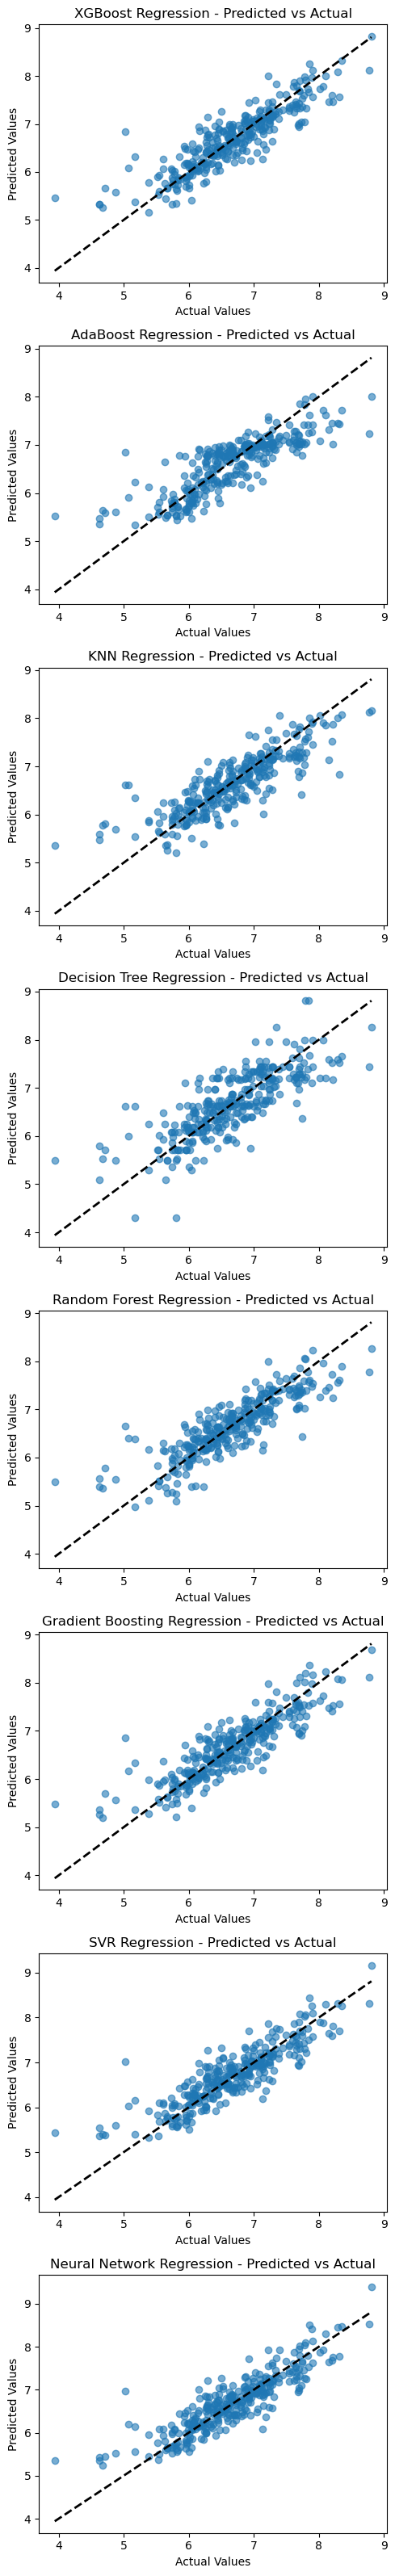

In [41]:
#using the extra parameters added on the test set
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.exceptions import ConvergenceWarning
import warnings

# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_test, and y_test are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_test = pd.DataFrame({...})
# y_test = pd.Series([...])

# Select the subset of 20 features
selected_features = feature_importances.index[:10]
X_train_val_subset = X_train_val[selected_features]
X_test_subset = X_test[selected_features]

# Define models with the best parameters found


best_params = {
    'XGBoost Regression': {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3,'colsample_bytree':0.6,'subsample':0.6},
    'AdaBoost Regression': {'n_estimators': 200, 'learning_rate': 0.2,'loss':'square'},
    'KNN Regression': {'n_neighbors': 7, 'weights': 'distance', 'algorithm': 'auto','leaf_size':10},
    'Decision Tree Regression': {'max_depth': 10, 'min_samples_split': 20,'min_samples_leaf':2},
    'Random Forest Regression': {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 10,'bootstrap':True},
    'Gradient Boosting Regression': {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3,'subsample':0.8},
    'SVR Regression': {'C': 10, 'kernel': 'rbf', 'gamma': 'auto','epsilon':0.1},
    'Neural Network Regression': {'hidden_layer_sizes': (50,50), 'activation': 'relu', 'solver': 'adam','alpha':0.1,'learning_rate':'constant'}
}

models = {
    'XGBoost Regression': XGBRegressor(random_state=random_state, **best_params['XGBoost Regression']),
    'AdaBoost Regression': AdaBoostRegressor(random_state=random_state, **best_params['AdaBoost Regression']),
    'KNN Regression': KNeighborsRegressor(**best_params['KNN Regression']),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=random_state, **best_params['Decision Tree Regression']),
    'Random Forest Regression': RandomForestRegressor(random_state=random_state, **best_params['Random Forest Regression']),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=random_state, **best_params['Gradient Boosting Regression']),
    'SVR Regression': SVR(**best_params['SVR Regression']),
    'Neural Network Regression': MLPRegressor(random_state=random_state, max_iter=1000, **best_params['Neural Network Regression'])
}

# Function to evaluate model on test data
def evaluate_on_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    y_test = np.ravel(y_test)
    predictions = np.ravel(predictions)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse) 
    r2 = r2_score(y_test, predictions)
    r, _ = pearsonr(y_test, predictions)
    return predictions, rmse, mae, mse, r2,r

# Evaluate each model
test_results = []
predictions_dict = {}

for name, model in models.items():
    predictions, rmse, mae, mse, r2,r = evaluate_on_test(model, X_train_val_subset, y_train_val, X_test_subset, y_test)
    test_results.append({
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'MSE': mse,
        'R2': r2,
        'R':r
    })
    predictions_dict[name] = predictions

# Convert test results to DataFrame
test_results_df = pd.DataFrame(test_results)

# Print the test results
print(test_results_df[['Model', 'RMSE', 'MSE', 'MAE', 'R2','R']])

# Visualization of the performance metrics
def plot_metrics(df):
    fig, axes = plt.subplots(1, 4, figsize=(24, 5))

    # RMSE
    axes[0].barh(df['Model'], df['RMSE'], color='skyblue')
    axes[0].set_title('RMSE by Model')
    axes[0].set_xlabel('RMSE')
    axes[0].invert_yaxis()

    # MAE
    axes[1].barh(df['Model'], df['MAE'], color='salmon')
    axes[1].set_title('MAE by Model')
    axes[1].set_xlabel('MAE')
    axes[1].invert_yaxis()

    # MSE
    axes[2].barh(df['Model'], df['MSE'], color='lightcoral')
    axes[2].set_title('MSE by Model')
    axes[2].set_xlabel('MSE')
    axes[2].invert_yaxis()

    # R2
    axes[3].barh(df['Model'], df['R2'], color='mediumseagreen')
    axes[3].set_title('R2 by Model')
    axes[3].set_xlabel('R2')
    axes[3].invert_yaxis()

    plt.tight_layout()
    plt.show()

# Plot the metrics
plot_metrics(test_results_df)

# Visualization of predicted vs actual values
def plot_predictions(predictions_dict, y_test):
    fig, axes = plt.subplots(len(predictions_dict), 1, figsize=(5, len(predictions_dict) * 4))

    for i, (name, predictions) in enumerate(predictions_dict.items()):
        axes[i].scatter(y_test, predictions, alpha=0.6)
        axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        axes[i].set_title(f'{name} - Predicted vs Actual')
        axes[i].set_xlabel('Actual Values')
        axes[i].set_ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

# Plot the predictions
plot_predictions(predictions_dict, y_test)

                           Model      RMSE       MSE       MAE        R2  \
0             XGBoost Regression  0.351160  0.123313  0.254578  0.774877   
1            AdaBoost Regression  0.421488  0.177652  0.320763  0.675676   
2                 KNN Regression  0.407463  0.166026  0.298125  0.696901   
3       Decision Tree Regression  0.476867  0.227402  0.368027  0.584852   
4       Random Forest Regression  0.391643  0.153384  0.291027  0.719981   
5   Gradient Boosting Regression  0.364935  0.133177  0.267358  0.756870   
6                 SVR Regression  0.362726  0.131570  0.272679  0.759803   
7      Neural Network Regression  0.356260  0.126921  0.265327  0.768292   
8               Voting Regressor  0.348839  0.121689  0.254881  0.777843   
9        Stacking Regressor (LR)  0.349888  0.122422  0.261105  0.776505   
10       Stacking Regressor (RF)  0.374965  0.140599  0.277423  0.743321   
11       Stacking Regressor (GB)  0.364455  0.132827  0.269729  0.757509   

           

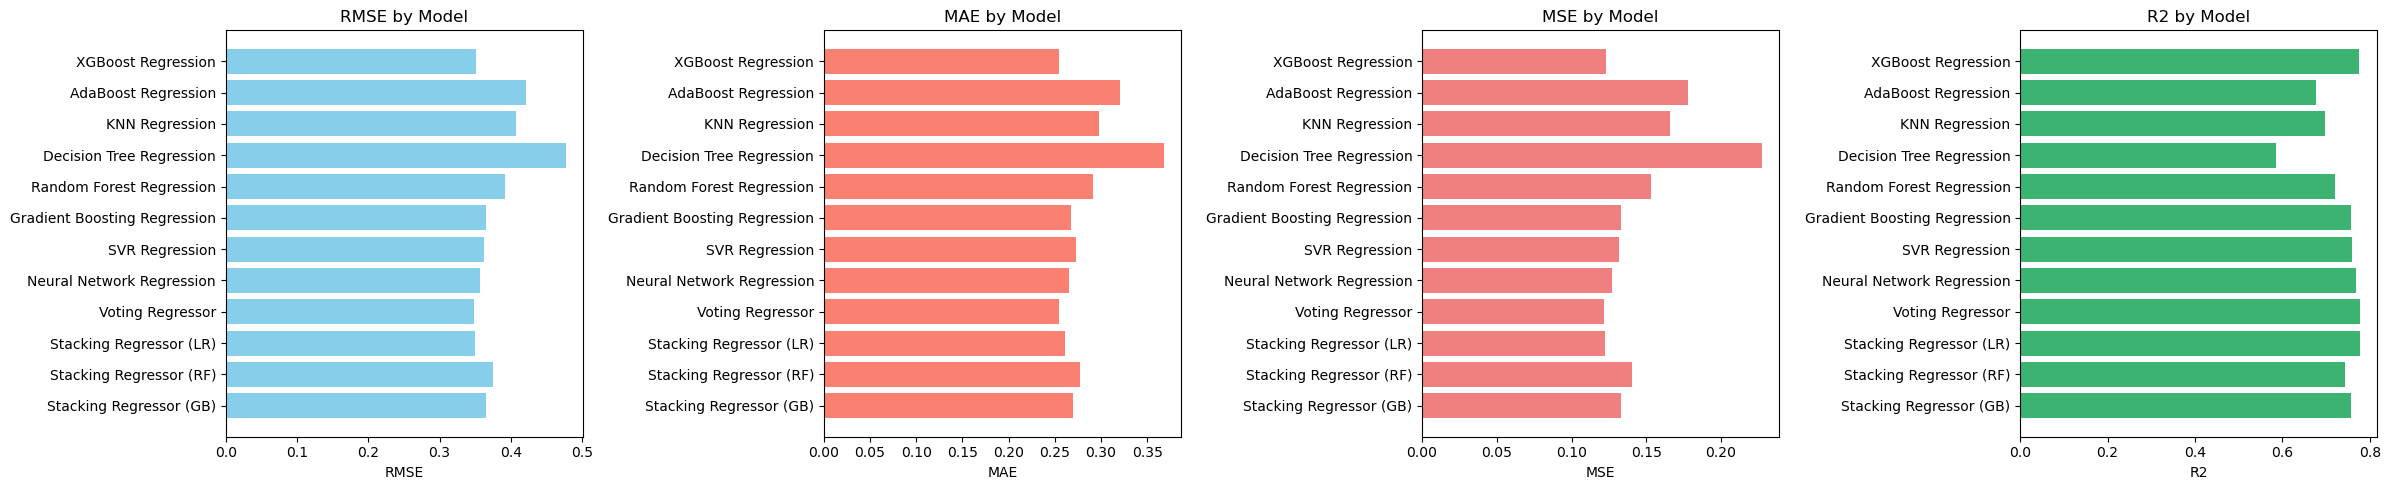

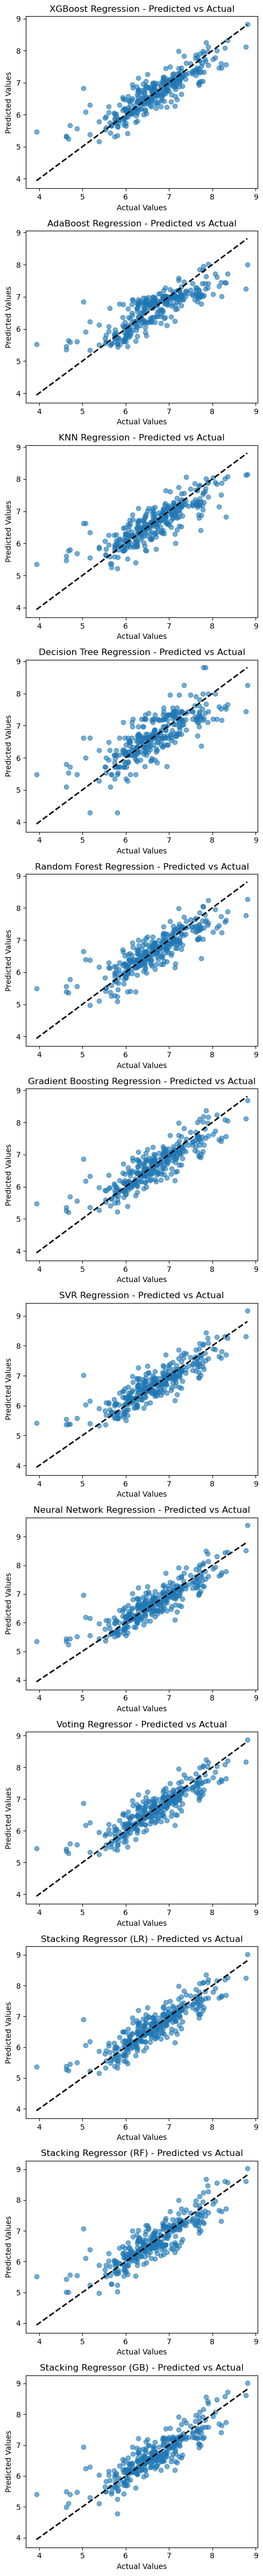

In [42]:
#using the extra parameters with ensembles  added on the test set
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.exceptions import ConvergenceWarning
import warnings

# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_test, and y_test are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_test = pd.DataFrame({...})
# y_test = pd.Series([...])

# Select the subset of 20 features
selected_features = feature_importances.index[:10]
X_train_val_subset = X_train_val[selected_features]
X_test_subset = X_test[selected_features]

# Define models with the best parameters found


best_params = {
    'XGBoost Regression': {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3,'colsample_bytree':0.6,'subsample':0.6},
    'AdaBoost Regression': {'n_estimators': 200, 'learning_rate': 0.2,'loss':'square'},
    'KNN Regression': {'n_neighbors': 7, 'weights': 'distance', 'algorithm': 'auto','leaf_size':10},
    'Decision Tree Regression': {'max_depth': 10, 'min_samples_split': 20,'min_samples_leaf':2},
    'Random Forest Regression': {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 10,'bootstrap':True},
    'Gradient Boosting Regression': {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3,'subsample':0.8},
    'SVR Regression': {'C': 10, 'kernel': 'rbf', 'gamma': 'auto','epsilon':0.1},
    'Neural Network Regression': {'hidden_layer_sizes': (50,50), 'activation': 'relu', 'solver': 'adam','alpha':0.1,'learning_rate':'constant'}
}

models = {
    'XGBoost Regression': XGBRegressor(random_state=random_state, **best_params['XGBoost Regression']),
    'AdaBoost Regression': AdaBoostRegressor(random_state=random_state, **best_params['AdaBoost Regression']),
    'KNN Regression': KNeighborsRegressor(**best_params['KNN Regression']),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=random_state, **best_params['Decision Tree Regression']),
    'Random Forest Regression': RandomForestRegressor(random_state=random_state, **best_params['Random Forest Regression']),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=random_state, **best_params['Gradient Boosting Regression']),
    'SVR Regression': SVR(**best_params['SVR Regression']),
    'Neural Network Regression': MLPRegressor(random_state=random_state, max_iter=1000, **best_params['Neural Network Regression'])
}

# Adding ensembling methods
voting_regressor = VotingRegressor(estimators=[
    ('xgb', models['XGBoost Regression']),
    ('rf', models['Random Forest Regression']),
    ('gb', models['Gradient Boosting Regression']),
    ('svr', models['SVR Regression']),
    ('nn', models['Neural Network Regression'])
])

stacking_regressor_lr = StackingRegressor(
    estimators=[
        ('xgb', models['XGBoost Regression']),
        ('rf', models['Random Forest Regression']),
        ('gb', models['Gradient Boosting Regression']),
        ('svr', models['SVR Regression']),
        ('nn', models['Neural Network Regression'])
    ],
    final_estimator=LinearRegression()
)

stacking_regressor_rf = StackingRegressor(
    estimators=[
        ('xgb', models['XGBoost Regression']),
        ('rf', models['Random Forest Regression']),
        ('gb', models['Gradient Boosting Regression']),
        ('svr', models['SVR Regression']),
        ('nn', models['Neural Network Regression'])
    ],
    final_estimator=RandomForestRegressor(n_estimators=100, random_state=random_state)
)

stacking_regressor_gb = StackingRegressor(
    estimators=[
        ('xgb', models['XGBoost Regression']),
        ('rf', models['Random Forest Regression']),
        ('gb', models['Gradient Boosting Regression']),
        ('svr', models['SVR Regression']),
        ('nn', models['Neural Network Regression'])
    ],
    final_estimator=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=random_state)
)

models.update({
    'Voting Regressor': voting_regressor,
    'Stacking Regressor (LR)': stacking_regressor_lr,
    'Stacking Regressor (RF)': stacking_regressor_rf,
    'Stacking Regressor (GB)': stacking_regressor_gb
})


# Function to evaluate model on test data
def evaluate_on_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    y_test = np.ravel(y_test)
    predictions = np.ravel(predictions)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse) 
    r2 = r2_score(y_test, predictions)
    r, _ = pearsonr(y_test, predictions)
    return predictions, rmse, mae, mse, r2,r

# Evaluate each model
test_results = []
predictions_dict = {}

for name, model in models.items():
    predictions, rmse, mae, mse, r2,r = evaluate_on_test(model, X_train_val_subset, y_train_val, X_test_subset, y_test)
    test_results.append({
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'MSE': mse,
        'R2': r2,
        'R':r
    })
    predictions_dict[name] = predictions

# Convert test results to DataFrame
test_results_df = pd.DataFrame(test_results)

# Print the test results
print(test_results_df[['Model', 'RMSE', 'MSE', 'MAE', 'R2','R']])

# Visualization of the performance metrics
def plot_metrics(df):
    fig, axes = plt.subplots(1, 4, figsize=(24, 5))

    # RMSE
    axes[0].barh(df['Model'], df['RMSE'], color='skyblue')
    axes[0].set_title('RMSE by Model')
    axes[0].set_xlabel('RMSE')
    axes[0].invert_yaxis()

    # MAE
    axes[1].barh(df['Model'], df['MAE'], color='salmon')
    axes[1].set_title('MAE by Model')
    axes[1].set_xlabel('MAE')
    axes[1].invert_yaxis()

    # MSE
    axes[2].barh(df['Model'], df['MSE'], color='lightcoral')
    axes[2].set_title('MSE by Model')
    axes[2].set_xlabel('MSE')
    axes[2].invert_yaxis()

    # R2
    axes[3].barh(df['Model'], df['R2'], color='mediumseagreen')
    axes[3].set_title('R2 by Model')
    axes[3].set_xlabel('R2')
    axes[3].invert_yaxis()

    plt.tight_layout()
    plt.show()

# Plot the metrics
plot_metrics(test_results_df)

# Visualization of predicted vs actual values
def plot_predictions(predictions_dict, y_test):
    fig, axes = plt.subplots(len(predictions_dict), 1, figsize=(5, len(predictions_dict) * 4))

    for i, (name, predictions) in enumerate(predictions_dict.items()):
        axes[i].scatter(y_test, predictions, alpha=0.6)
        axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        axes[i].set_title(f'{name} - Predicted vs Actual')
        axes[i].set_xlabel('Actual Values')
        axes[i].set_ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

# Plot the predictions
plot_predictions(predictions_dict, y_test)

In [43]:
X_train_val_subset.head()

,goals_ag_itb,saves_itb,saves_otb,goals_ag_otb,aerials_w,saved_pen,lballs_acc,dangmistakes,closeness_centrality,flow_centrality
650,0.000000,0.125,0.000,0.0,0.000000,0.0,0.571429,0.0,0.542639,0.505643
1313,0.000000,0.000,0.125,0.0,0.000000,0.0,0.071429,0.0,0.727906,0.398809
1513,0.166667,0.125,0.000,0.0,0.000000,0.0,0.178571,0.0,0.430875,0.407267
381,0.000000,0.125,0.000,0.0,0.000000,0.0,0.071429,0.0,0.394646,0.391082
1088,0.000000,0.125,0.125,0.0,0.166667,0.0,0.250000,0.0,0.654484,0.668844


In [ ]:
#saving model

In [44]:
import joblib

In [50]:
# Save the best model
joblib_file = "Voting_regressor_lr_model.pkl"  
joblib.dump(models['Voting Regressor'], joblib_file)

['Voting_regressor_lr_model.pkl']